# Cancer Predictive Model: EDA

**Author's Name: Haya Hadaya**

**Table of Content:**

1.[Introduction](#Introduction)

2.[Data Dictionary](#Data-Dictionary)

3.[Data Exploration and Cleaning](#Data-Exploration-and-Cleaning)

4.[EDA](#EDA)

5.[Statistical Analysis & Data Preprocessing](#Statistical-Analysis-&-Data-Preprocessing)

6.[Conclusion](#Conclusion)

## Introduction<a id="Introduction"></a>

Cancer remains a significant public health challenge globally, representing a complex interplay of genetic, environmental, and behavioral factors.In this report, we delve into the intricate relationship between diverse demographic and health-related categorical variables and the occurrence of cancer using the Behavioral Risk Factor Surveillance System (BRFSS) dataset. Through an exploratory data analysis (EDA) on this dataset, we comprehensively examined categorical factors such as health checkup frequencies, chronic health conditions, lifestyle habits, and demographic characteristics. The EDA process allowed us to gain initial insights into the distributions, correlations, and potential associations among these variables concerning the presence or absence of cancer. Employing both chi-square tests for association and Cramér's V measurement, our investigation seeks to unearth statistically significant correlations between these variables and the presence or absence of cancer. Understanding these associations can provide valuable insights into the nuanced interplay of these factors, offering a basis for targeted interventions and risk assessment strategies in cancer prevention and management.

## Data Dictionary<a id="Data-Dictionary"></a>

|Features|Description|Values| 
|-----|:-----|:-----|
|_RFHLTH|Adults with good or better health|1:Good or Better Health, 2:Fair or Poor Health, 9:Don’t know/Not Sure Or Refused/Missing 
|SEXVAR|Sex of Respondent|1:Male, 2:Female|
| TOLDHI3 |High cholesterol levels|1:Yes, 2:No , 7:Don’t know/Not Sure Or Refused/Missing| 
| CHECKUP1 |About how long has it been since a person visited a doctor for a routine checkup|1:within past year, 2:Within past 2 years, 3:Within past 5 years ,4: 5 or more years ago , 7:Don’t know/Not sure, 8:Never , 9:Refused  |
| CHCCOPD3 |A person had C.O.P.D. (chronic obstructive pulmonary disease), emphysema or chronic bronchitis|1:Yes, 2:No , 7:Don’t know/Not Sure, 9: Refused  |
| HAVARTH5 | A person had some form of arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia|1:Yes, 2:No , 7:Don’t know/Not Sure, 9: Refused  |
 | DIABETE4 | A person had diabetes|1:Yes, 2:Yes, but female told only during pregnancy , 3:No , 4:No, pre-diabetes or borderline diabetes, 7:Don’t know/Not Sure, 9: Refused  |
| _RFHYPE6  | Adults who have been told they have high blood pressure|1:No, 2:Yes, 9:Don’t know/Not Sure/Refused/Missing|
| _PHYS14D |  3 level not good physical health status: 0 days, 1-13 days, 14-30 days|1:Zero days when physical health not good, 2:(1-13) days when physical health not good, 3:(14+) days when physical health not good , 9:Don’t know/Not Sure/Refused/Missing|
|_AGE_G | Six-level imputed age category|1:Age 18 to 24, 2:Age 25 to 34, 3: Age 35 to 44  , 4:Age 45 to 54 , 5:Age 55 to 64 , 6:Age 65 or older|
|_IMPRACE | Imputed race/ethnicity value|1: White, Non-Hispanic, 2: Black, Non-Hispanic, 3: Asian, Non-Hispanic,4:American Indian/Alaskan Native, Non-Hispanic, 5:Hispanic, 6:Other race, Non-Hispanic   |
|_RFBMI5 | Adults who have a body mass index greater than 25.00 (Overweight or Obese) |1:No , 2:Yes, 9:Don’t know/Refused/Missing |
|_SMOKER3 | Four-level smoker status: Everyday smoker, Someday smoker, Former smoker, Non-smoker |1:Current smoker, 2:Current smoker, 3:Former smoker , 4:Never smoked, 9:Don’t know/Refused/Missing |
|_RFDRHV7 | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)  |1:No , 2:Yes, 9:Don’t know/Refused/Missing |
|_TOTINDA | Adults who reported doing physical activity or exercise during the past 30 days other than their regular job  |1:Had physical activity or exercise, 2:No physical activity or exercise in last 30 days, 9:Don’t know/Refused/Missing |
|CHCKDNY2 |kidney disease presence|1:Yes, 2:No , 7:Don’t know / Not sure , 9:refused |
|_FRTLT1A |Consume Fruit 1 or more times per day|1:Consumed fruit one or more times per day, 2:Consumed fruit < one time per day , 9:Don´t know, refused or missing values |
|Cancer |Risk of presence or absence of Cancer|1:Presence of Cancer ,0:Absence of Cancer |


## Part 1: Data Exploration and Cleaning<a id="Data-Exploration-and-Cleaning"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To load dataset
df = pd.read_sas("C:\\Users\\hayah\\Downloads\\LLCP2021.XPT")

To check all the columns in our dataset :

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#overview of the structure of the dataset
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHON1,LADULT1,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,BPHIGH6,BPMEDS,CHOLCHK3,TOLDHI3,CHOLMED3,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD3,ADDEPEV3,CHCKDNY2,DIABETE4,DIABAGE3,HAVARTH5,ARTHEXER,ARTHEDU,LMTJOIN3,ARTHDIS2,JOINPAI2,MARITAL,EDUCA,RENTHOM1,NUMHHOL3,NUMPHON3,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME3,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,USENOW3,ECIGNOW1,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,IMFVPLA2,PNEUVAC4,HIVTST7,HIVTSTD3,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,PDIABTST,PREDIAB1,INSULIN1,BLDSUGAR,FEETCHK3,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM1,DIABEYE,DIABEDU,TOLDCFS,HAVECFS,WORKCFS,TOLDHEPC,TRETHEPC,PRIRHEPC,HAVEHEPC,HAVEHEPB,MEDSHEPB,HPVADVC4,HPVADSHT,TETANUS1,SHINGLE2,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,HADMAM,HOWLONG,CERVSCRN,CRVCLCNC,CRVCLPAP,CRVCLHPV,HADHYST2,PSATEST1,PSATIME1,PCPSARS2,PCSTALK,HADSIGM4,COLNSIGM,COLNTES1,SIGMTES1,LASTSIG4,COLNCNCR,VIRCOLO1,VCLNTES1,SMALSTOL,STOLTEST,STOOLDN1,BLDSTFIT,SDNATES1,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,HOMBPCHK,HOMRGCHK,WHEREBP,SHAREBP,WTCHSALT,DRADVISE,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,MARIJAN1,USEMRJN3,RSNMRJN2,LASTSMK2,STOPSMK2,FIREARM5,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE1,CAGEG,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_RFHYPE6,_CHOLCH3,_RFCHOL3,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR3,_LMTACT3,_LMTWRK3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_CURECI1,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_AIDTST4,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,1.0,1.0,b'01192021',b'01',b'19',b'2021',1100.0,b'2021000001',2.021000e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,20.0,10.0,88.0,3.0,1.0,2.0,2.0,2.0,3.0,NaN,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,NaN,1.0,2.0,2.0,2.0,1.0,8.0,1.0,4.0,1.0,1.0,1.0,1.0,2.0,7.0,88.0,5.0,NaN,72.0,411.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,3.0,3.0,888.0,NaN,NaN,NaN,1.0,92020.0,1.0,1.0,2.0,NaN,101.0,555.0,204.0,203.0,201.0,101.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,1.0,1.0,1.0,11011.0,39.766158,2.0,79.532315,1.0,9.0,NaN,NaN,NaN,NaN,1.0,0.519019,874.242902,744.745531,2.0,3.0,2.0,1.0,9.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,11.0,2.0,70.0,6.0,59.0,150.0,3266.0,1454.0,1.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,5.397605e-79,100.0,5.700000e+01,4.300000e+01,14.0,100.0,5.397605e-79,5.397605e-79,1.0,1.0,100.0,214.0,1.0,1.0,1.0,1.0,5.397605e-79,5.3

In [5]:
# Total number of rows and columns
df.shape

(438693, 303)

In [6]:
# Name of some columns in our dataset
df.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENM1',
       ...
       '_FRTRES1', '_VEGRES1', '_FRUTSU1', '_VEGESU1', '_FRTLT1A', '_VEGLT1A',
       '_FRT16A', '_VEG23A', '_FRUITE1', '_VEGETE1'],
      dtype='object', length=303)

In [7]:
# Dataset overview (data type , total number of rows and columns , memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438693 entries, 0 to 438692
Columns: 303 entries, _STATE to _VEGETE1
dtypes: float64(298), object(5)
memory usage: 1014.1+ MB


In [8]:
#Create a new column 'Cancer' from the data in the 'CHCOCNCR' column 
condition = (df['CHCOCNCR'] == 1).astype(int)
df['Cancer'] = np.where(condition, 1, 0)

We created a new column 'Cancer' from the data in the 'CHCOCNCR' column to give value of '1' for people with cancer (high risk of  cancer) and value of '0' for people without cancer.

In [9]:
# the count of presence or absence of Cancer

print(df['Cancer'].value_counts())

Cancer
0    396344
1     42349
Name: count, dtype: int64


To visualize the count of presence or absence of Cancer:

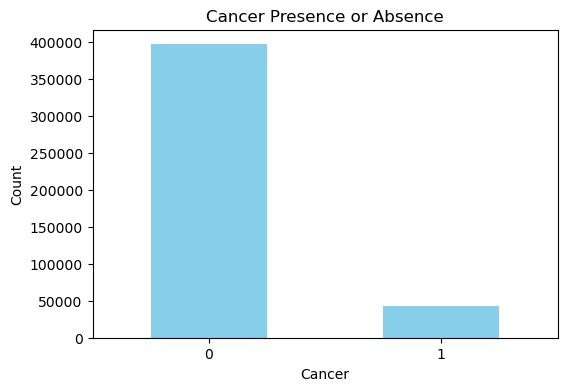

In [51]:
plt.figure(figsize=(6, 4))
df['Cancer'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Cancer Presence or Absence')
plt.xlabel('Cancer')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Now, we will drop the original 'CHCOCNCR' column 

In [10]:
df.drop(columns=['CHCOCNCR'], inplace=True)

We will check that our 'lung_cancer' column was added to our dataframe and 'CHCOCNCR' column was removed.

In [11]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHON1,LADULT1,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,BPHIGH6,BPMEDS,CHOLCHK3,TOLDHI3,CHOLMED3,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCCOPD3,ADDEPEV3,CHCKDNY2,DIABETE4,DIABAGE3,HAVARTH5,ARTHEXER,ARTHEDU,LMTJOIN3,ARTHDIS2,JOINPAI2,MARITAL,EDUCA,RENTHOM1,NUMHHOL3,NUMPHON3,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME3,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,USENOW3,ECIGNOW1,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,IMFVPLA2,PNEUVAC4,HIVTST7,HIVTSTD3,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,PDIABTST,PREDIAB1,INSULIN1,BLDSUGAR,FEETCHK3,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM1,DIABEYE,DIABEDU,TOLDCFS,HAVECFS,WORKCFS,TOLDHEPC,TRETHEPC,PRIRHEPC,HAVEHEPC,HAVEHEPB,MEDSHEPB,HPVADVC4,HPVADSHT,TETANUS1,SHINGLE2,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,HADMAM,HOWLONG,CERVSCRN,CRVCLCNC,CRVCLPAP,CRVCLHPV,HADHYST2,PSATEST1,PSATIME1,PCPSARS2,PCSTALK,HADSIGM4,COLNSIGM,COLNTES1,SIGMTES1,LASTSIG4,COLNCNCR,VIRCOLO1,VCLNTES1,SMALSTOL,STOLTEST,STOOLDN1,BLDSTFIT,SDNATES1,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,HOMBPCHK,HOMRGCHK,WHEREBP,SHAREBP,WTCHSALT,DRADVISE,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,MARIJAN1,USEMRJN3,RSNMRJN2,LASTSMK2,STOPSMK2,FIREARM5,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE1,CAGEG,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_RFHYPE6,_CHOLCH3,_RFCHOL3,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR3,_LMTACT3,_LMTWRK3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_CURECI1,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_AIDTST4,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,Cancer
0,1.0,1.0,b'01192021',b'01',b'19',b'2021',1100.0,b'2021000001',2.021000e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,20.0,10.0,88.0,3.0,1.0,2.0,2.0,2.0,3.0,NaN,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,NaN,1.0,2.0,2.0,2.0,1.0,8.0,1.0,4.0,1.0,1.0,1.0,1.0,2.0,7.0,88.0,5.0,NaN,72.0,411.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,3.0,3.0,888.0,NaN,NaN,NaN,1.0,92020.0,1.0,1.0,2.0,NaN,101.0,555.0,204.0,203.0,201.0,101.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,1.0,1.0,1.0,11011.0,39.766158,2.0,79.532315,1.0,9.0,NaN,NaN,NaN,NaN,1.0,0.519019,874.242902,744.745531,2.0,3.0,2.0,1.0,9.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,11.0,2.0,70.0,6.0,59.0,150.0,3266.0,1454.0,1.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,5.397605e-79,100.0,5.700000e+01,4.300000e+01,14.0,100.0,5.397605e-79,5.397605e-79,1.0,1.0,100.0,214.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e

In [12]:
# check the exact duplicates rows:
df.duplicated().sum()

0

We have zero duplicated rows in our dataset.

In [13]:
num_duplicated = len(df.columns) - len(df.columns.drop_duplicates())

print(f"Number of duplicated columns: {num_duplicated}")

Number of duplicated columns: 0


First , we will look at the correlation between most related columns and Cancer column to choose the best variables for our dataset.

The list of first subset of selected columns : SEXVAR,GENHLTH,PHYSHLTH, MENTHLTH, POORHLTH, MEDCOST1 ,CHECKUP1, EXERANY2,BPHIGH6, BPMEDS,CHOLCHK3, TOLDHI3, CHOLMED3.


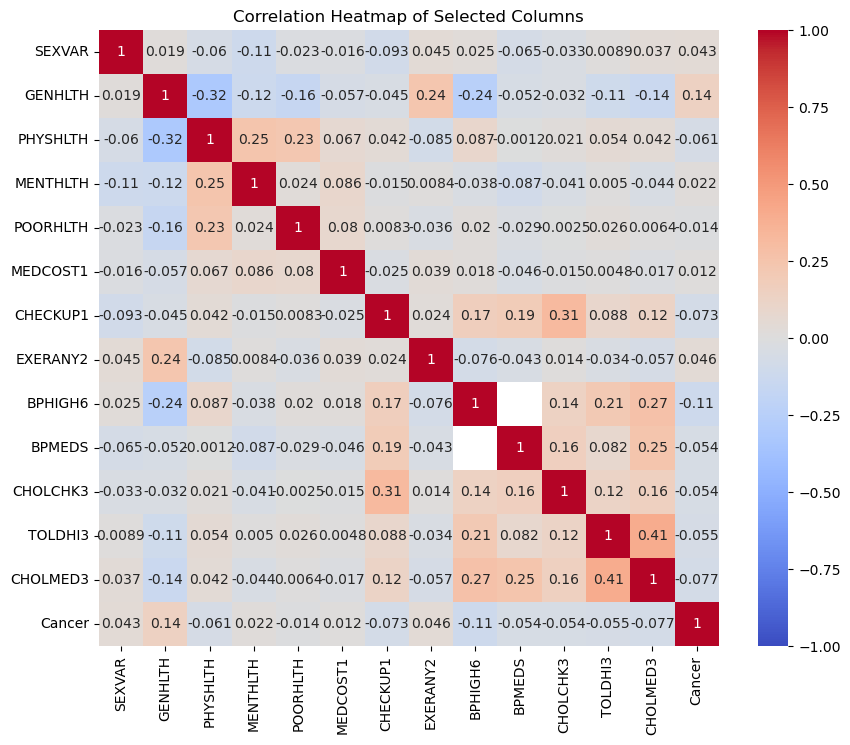

In [14]:
selected_columns = ['SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'MEDCOST1',
                    'CHECKUP1', 'EXERANY2', 'BPHIGH6', 'BPMEDS', 'CHOLCHK3', 'TOLDHI3',
                    'CHOLMED3', 'Cancer']

# Calculate correlation matrix for selected columns
correlation_matrix = df[selected_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',vmax=1,vmin=-1)
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

There are weak correlations between Cancer and the following variables 'BPMEDS', 'CHOLCHK3', 'TOLDHI3','CHOLMED3','BPHIGH6','CHECKUP1','GENHLTH','SEXVAR', 'PHYSHLTH'. No strong correlations appear between any of our independent variables and the target variable.

The list of second subset of selected columns :'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHNOW', 'CHCCOPD3', 'ADDEPEV3',
    'CHCKDNY2', 'DIABETE4', 'HAVARTH5', 'DEAF', 'BLIND', 'DECIDE',
    'DIFFWALK', 'FLUSHOT7', 'HIVTST7', 'FVGREEN1', 'PDIABTST'

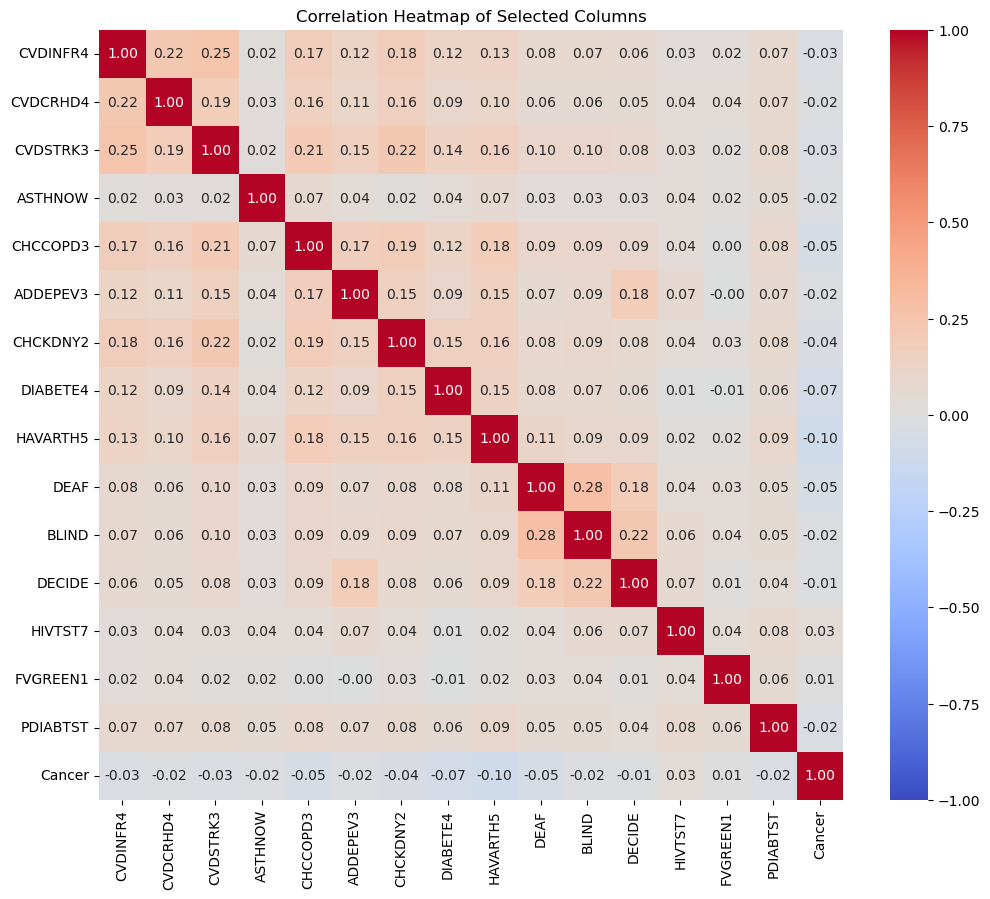

In [15]:
selected_columns1 = [
    'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHNOW', 'CHCCOPD3', 'ADDEPEV3',
    'CHCKDNY2', 'DIABETE4', 'HAVARTH5', 'DEAF', 'BLIND', 'DECIDE', 'HIVTST7', 'FVGREEN1', 'PDIABTST', 'Cancer'
]

# Creating a correlation matrix for the selected columns
correlation_matrix = df[selected_columns1].corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',vmax=1,vmin=-1)
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

From the above heatmap , we observe weak correlation between the independent variables and the target variable.CHCCOPD3,HAVARTH5 and DIABETE4 have the most suitable correlation with our target variable.CHCKDNY2 is considered to have effect on our target variable.

The list of third subset of selected columns :'INSULIN1', 'BLDSUGAR', 'TOLDHEPC', 'HAVEHEPB', 'HPVADVC4', 'TETANUS1', 'SHINGLE2','PSATEST1', '_RFHLTH', '_PHYS14D', '_MENT14D', '_TOTINDA', '_RFHYPE6', '_CHOLCH3' 


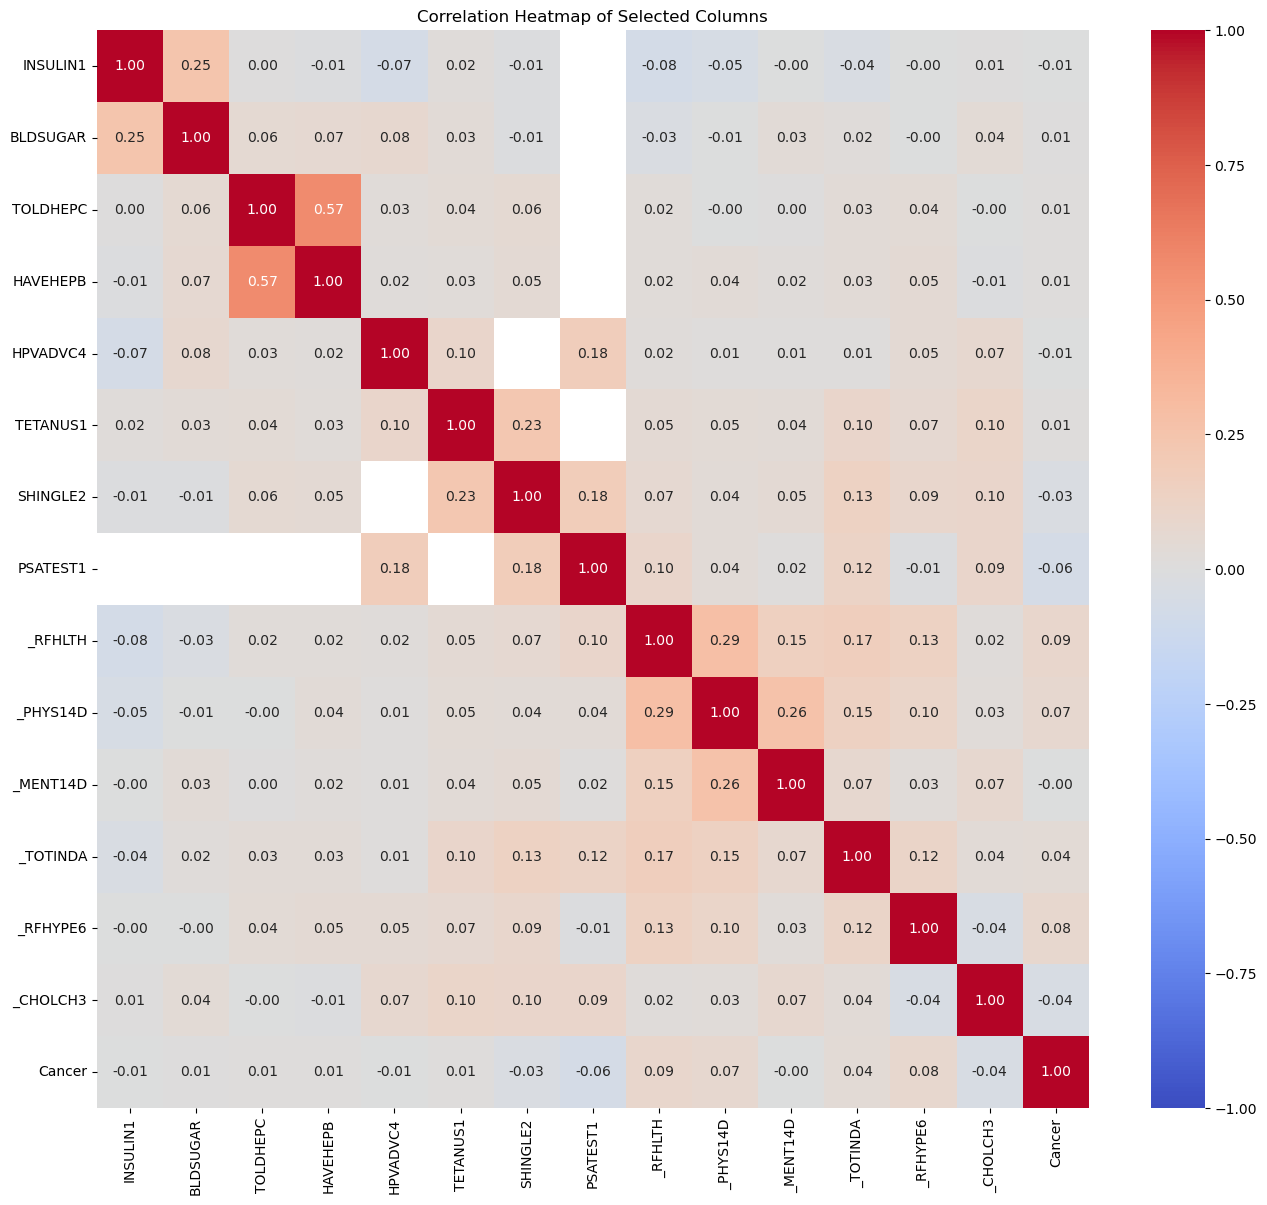

In [16]:
selected_columns2 = [
    'INSULIN1', 'BLDSUGAR', 'TOLDHEPC', 'HAVEHEPB', 'HPVADVC4', 'TETANUS1', 'SHINGLE2',
    'PSATEST1', '_RFHLTH', '_PHYS14D', '_MENT14D', '_TOTINDA', '_RFHYPE6', '_CHOLCH3','Cancer'  
]

# Creating a correlation matrix for the selected columns
correlation_matrix = df[selected_columns2].corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',vmax=1,vmin=-1)
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

From the above heatmap , the most significant variables were _RFHYPE6,_RFHLTH and _PHYS14D.

The list of fourth subset of selected columns :'_CASTHM1', '_DRDXAR3', '_LMTACT3', '_RFBMI5', '_SMOKER3',
    '_RFDRHV7', '_FRTLT1A', '_VEGLT1A', '_RFDRHV7', '_IMPRACE', '_AGE_G', '_STATE'

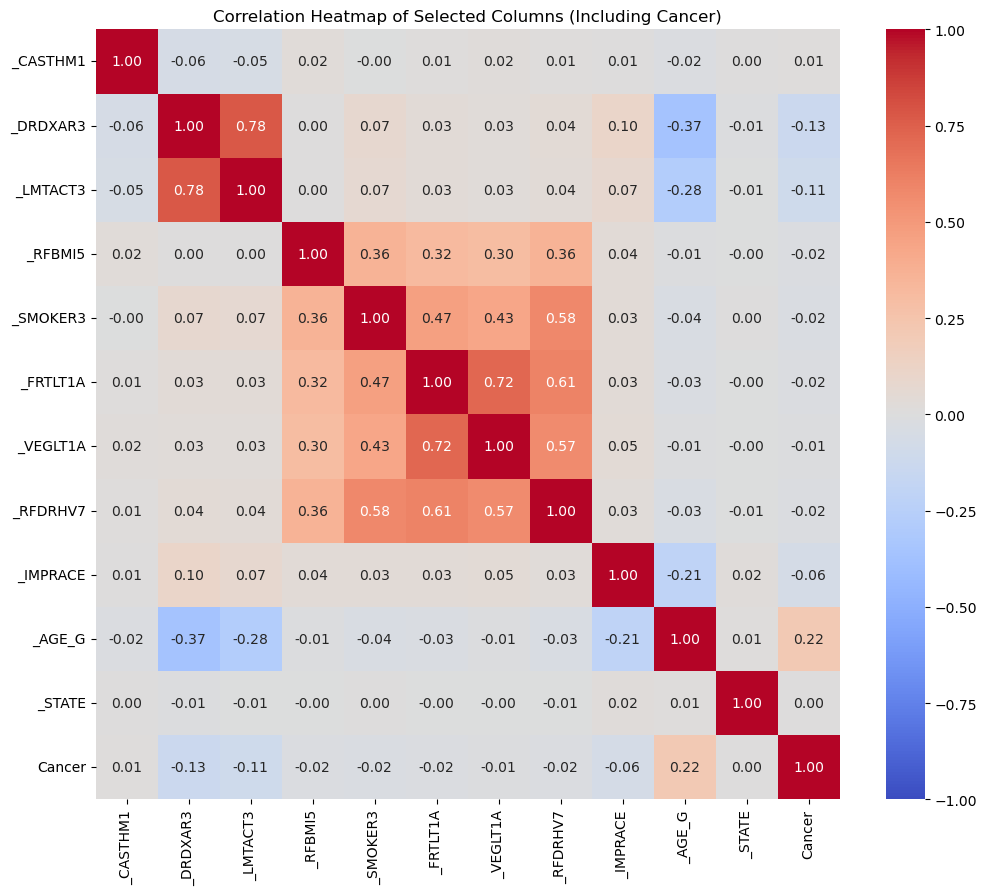

In [17]:
# Selecting the specified columns for correlation analysis
selected_columns3 = [
    '_CASTHM1', '_DRDXAR3', '_LMTACT3', '_RFBMI5', '_SMOKER3', '_FRTLT1A', '_VEGLT1A', '_RFDRHV7', '_IMPRACE', '_AGE_G', '_STATE','Cancer'
]

# Creating a correlation matrix for the selected columns
correlation_matrix = df[selected_columns3].corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',vmax=1,vmin=-1)
plt.title('Correlation Heatmap of Selected Columns (Including Cancer)')
plt.show()

From the above heatmap, the columns_AGE_G,_IMPRACE,_LMTACT3 and _DRDXAR3 had the most significant correlation with our target variable. However , '_RFBMI5', '_SMOKER3' and '_RFDRHV7' are considered to have effect on cancer, so we will keep them for now.

Now, we intend to enhance our DataFrame by selectively incorporating columns displaying weak yet notable correlations with our target variable ('Cancer'), as revealed through correlation analysis. Additionally, we'll include columns recognized for their relevance in scientific research pertaining to cancer prediction.

In [18]:
selected_columns = [
    '_RFHLTH', 'TOLDHI3', 'CHECKUP1', 'SEXVAR', 'CHCCOPD3', 'HAVARTH5', 'DIABETE4',
    '_RFHYPE6', '_PHYS14D', '_AGE_G', '_IMPRACE', '_RFBMI5', '_SMOKER3', '_RFDRHV7',
    '_TOTINDA', 'CHCKDNY2', '_FRTLT1A', 'Cancer'
]

df = df[selected_columns]

To check our updated dataframe:


In [19]:
df.head()

,_RFHLTH,TOLDHI3,CHECKUP1,SEXVAR,CHCCOPD3,HAVARTH5,DIABETE4,_RFHYPE6,_PHYS14D,_AGE_G,_IMPRACE,_RFBMI5,_SMOKER3,_RFDRHV7,_TOTINDA,CHCKDNY2,_FRTLT1A,Cancer
0,2.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,3.0,6.0,1.0,1.0,3.0,1.0,2.0,2.0,1.0,0
1,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,6.0,2.0,9.0,4.0,1.0,1.0,1.0,1.0,0
2,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,6.0,2.0,2.0,4.0,1.0,2.0,2.0,1.0,0
3,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,5.0,1.0,2.0,4.0,1.0,1.0,2.0,1.0,0
4,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,3.0,6.0,6.0,2.0,4.0,1.0,1.0,2.0,1.0,0


In [20]:
# sanity checks with a sample of 10 rows:
df.sample(10)

,_RFHLTH,TOLDHI3,CHECKUP1,SEXVAR,CHCCOPD3,HAVARTH5,DIABETE4,_RFHYPE6,_PHYS14D,_AGE_G,_IMPRACE,_RFBMI5,_SMOKER3,_RFDRHV7,_TOTINDA,CHCKDNY2,_FRTLT1A,Cancer
367030,2.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,3.0,5.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,0
99718,2.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,2.0,6.0,1.0,9.0,9.0,9.0,2.0,2.0,9.0,0
130474,1.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,2.0,5.0,2.0,1.0,4.0,1.0,1.0,2.0,1.0,0
26393,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,6.0,3.0,2.0,4.0,1.0,1.0,2.0,2.0,0
361282,1.0,1.0,1.0,2.0,2.0,1.0,3.0,1.0,3.0,6.0,1.0,2.0,4.0,1.0,1.0,2.0,1.0,0
111130,1.0,NaN,4.0,1.0,2.0,2.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0
366778,1.0,1.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,6.0,5.0,9.0,4.0,1.0,1.0,2.0,1.0,0
159384,1.0,2.0,1.0,1.0,2.0,2.0,3.0,2.0,1.0,4.0,2.0,2.0,9.0,9.0,1.0,2.0,9.0,0
396875,1.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,3.0,6.0,1.0,1.0,4.0,1.0,1.0,1.0,2.0,1
91936,1.0,NaN,1.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,5.0,2.0,4.0,1.0,1.0,2.0,1.0,0


In [21]:
#check for duplicated columns by transpose

df.T.duplicated()

_RFHLTH     False
TOLDHI3     False
CHECKUP1    False
SEXVAR      False
CHCCOPD3    False
HAVARTH5    False
DIABETE4    False
_RFHYPE6    False
_PHYS14D    False
_AGE_G      False
_IMPRACE    False
_RFBMI5     False
_SMOKER3    False
_RFDRHV7    False
_TOTINDA    False
CHCKDNY2    False
_FRTLT1A    False
Cancer      False
dtype: bool

There are no duplicated columns in the dataset

In [22]:
#Type of data in each column
column_types = df.dtypes
print(column_types)

_RFHLTH     float64
TOLDHI3     float64
CHECKUP1    float64
SEXVAR      float64
CHCCOPD3    float64
HAVARTH5    float64
DIABETE4    float64
_RFHYPE6    float64
_PHYS14D    float64
_AGE_G      float64
_IMPRACE    float64
_RFBMI5     float64
_SMOKER3    float64
_RFDRHV7    float64
_TOTINDA    float64
CHCKDNY2    float64
_FRTLT1A    float64
Cancer        int32
dtype: object


To calculates the percentage of duplicated rows :

In [23]:
df.duplicated().sum()/df.shape[0]*100

60.24805501797385

After minimizing the number of columns, we got %60.24 of duplicated rows. Now , we will check the distribution of each column with and without the duplicated rows.

We will create a new dataframe without duplicated rows:

In [24]:
new_df = df.drop_duplicates()

In [25]:
new_df.shape

(174389, 18)

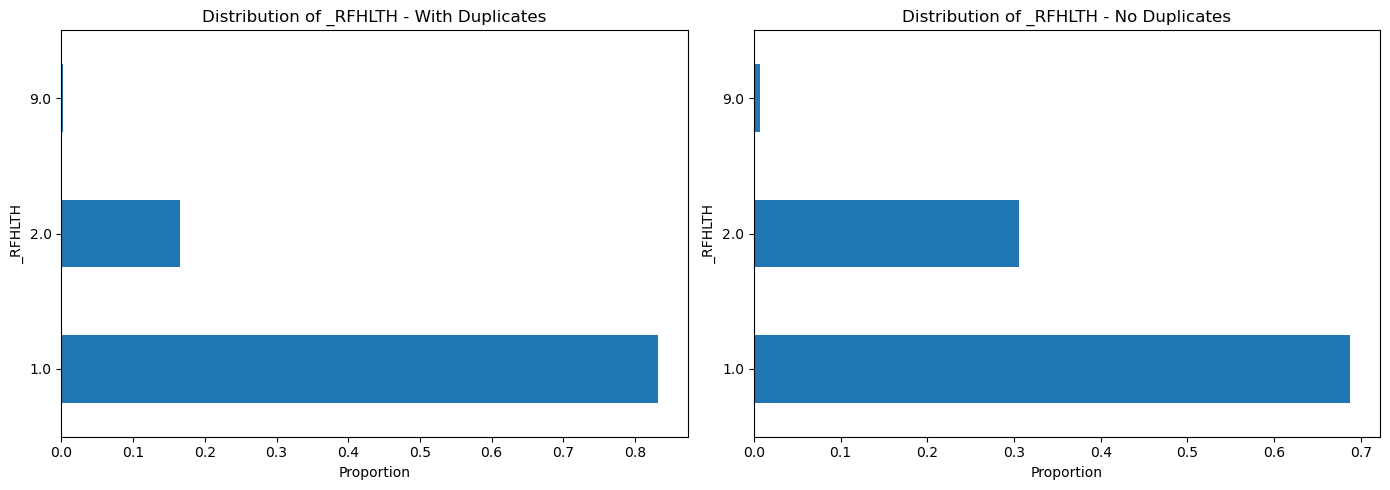

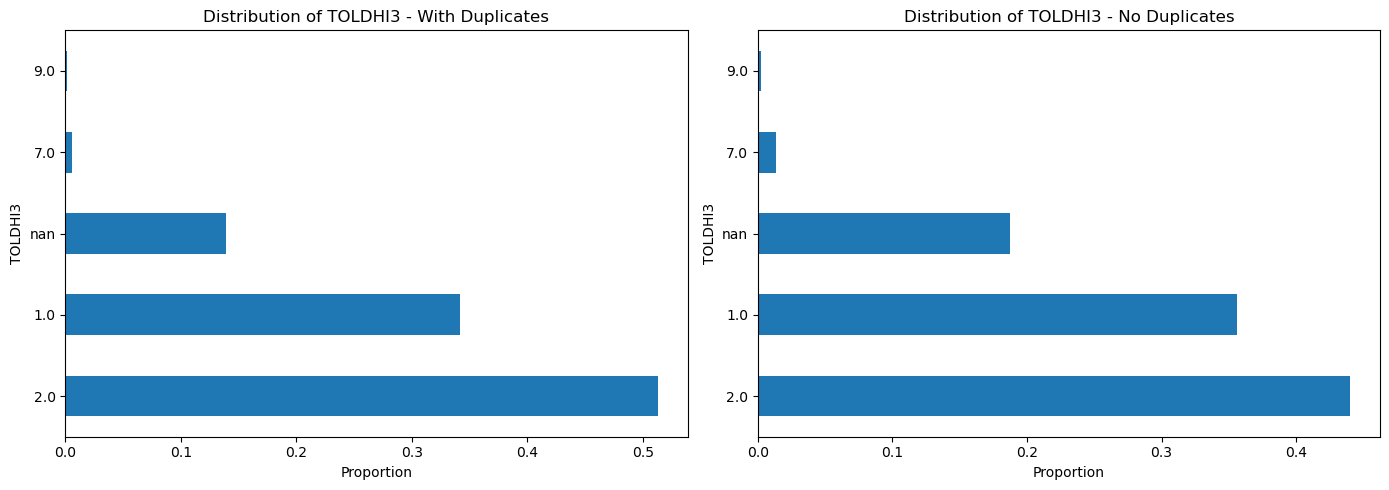

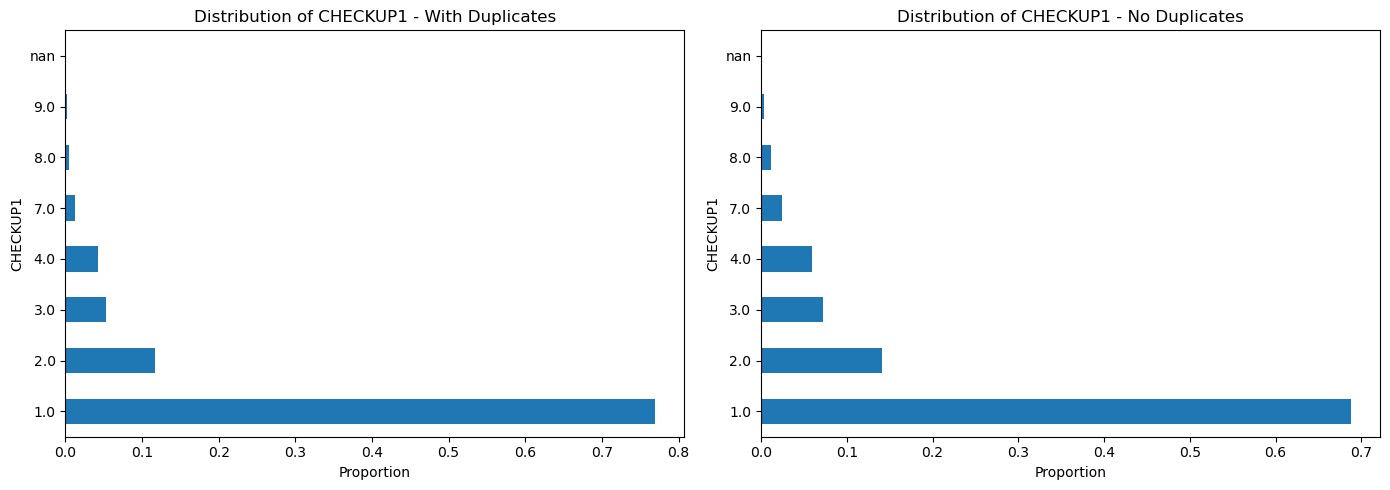

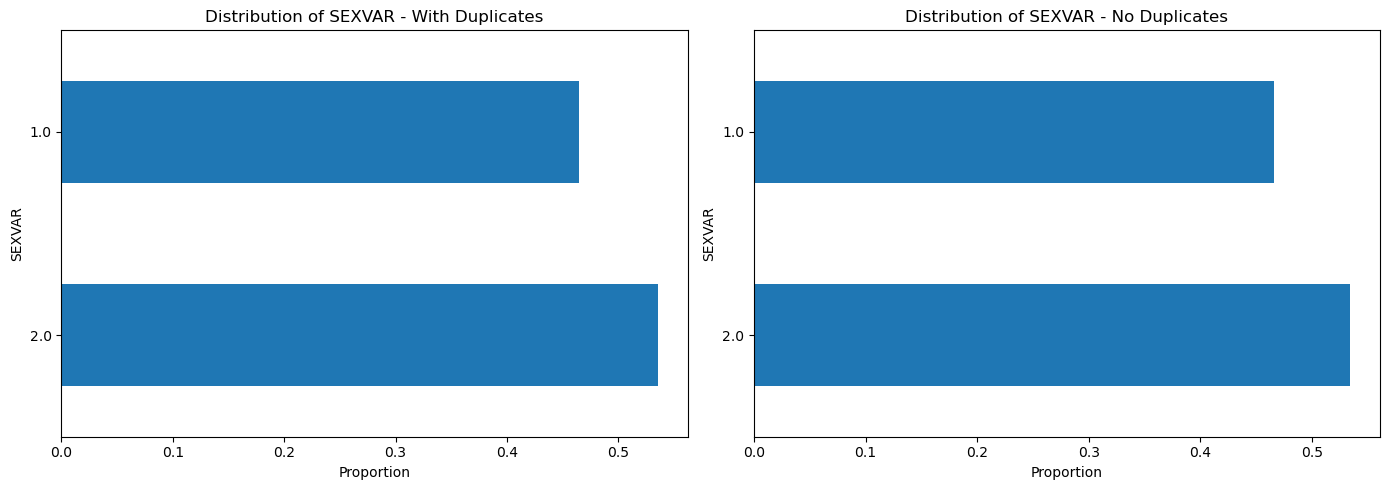

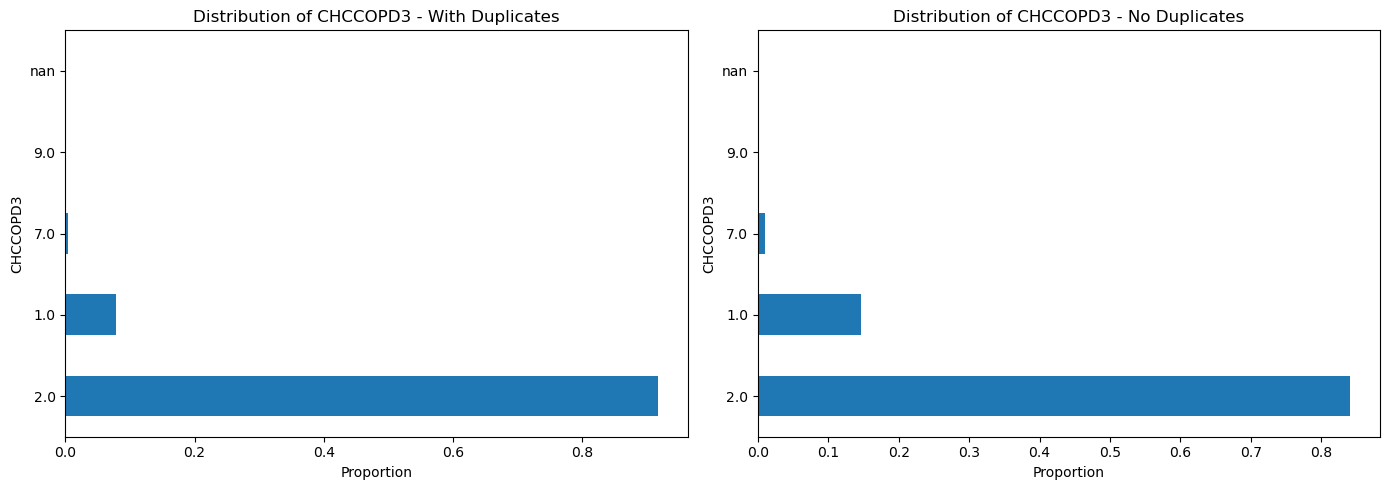

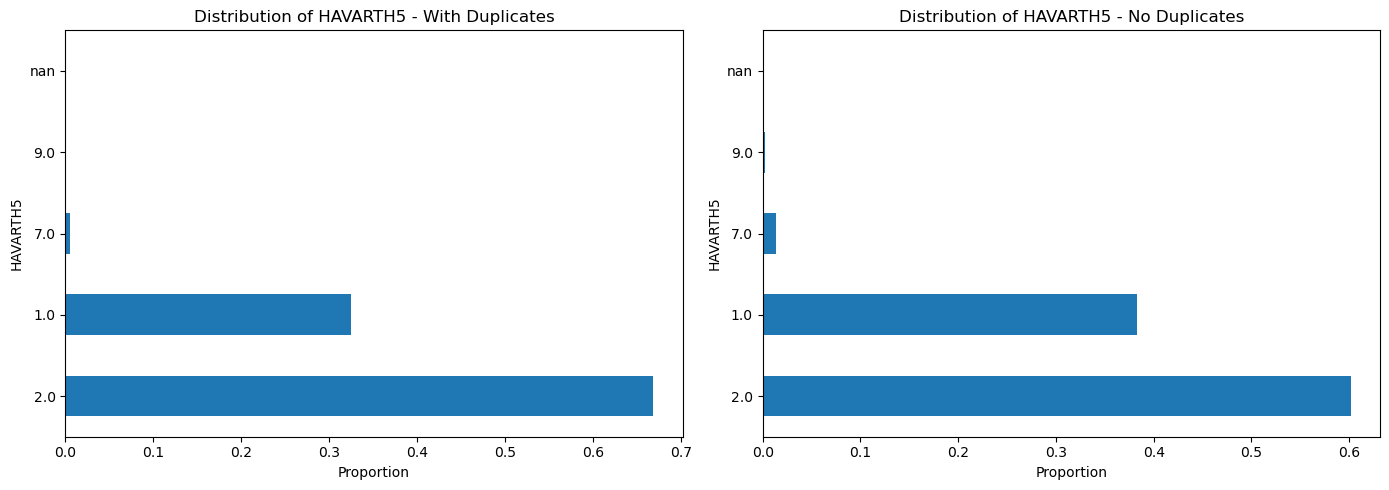

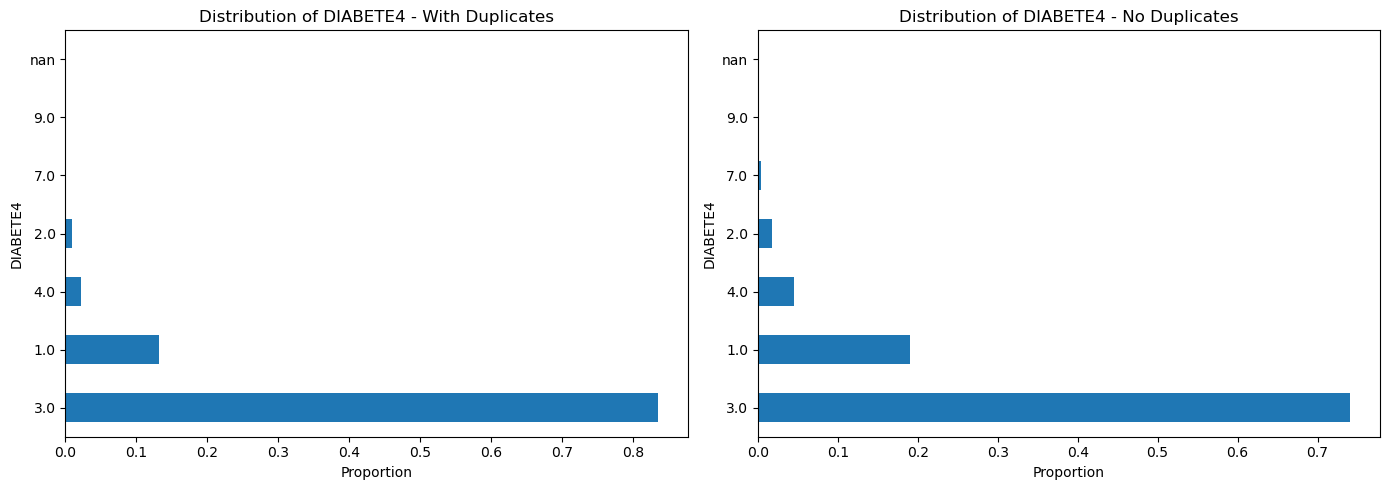

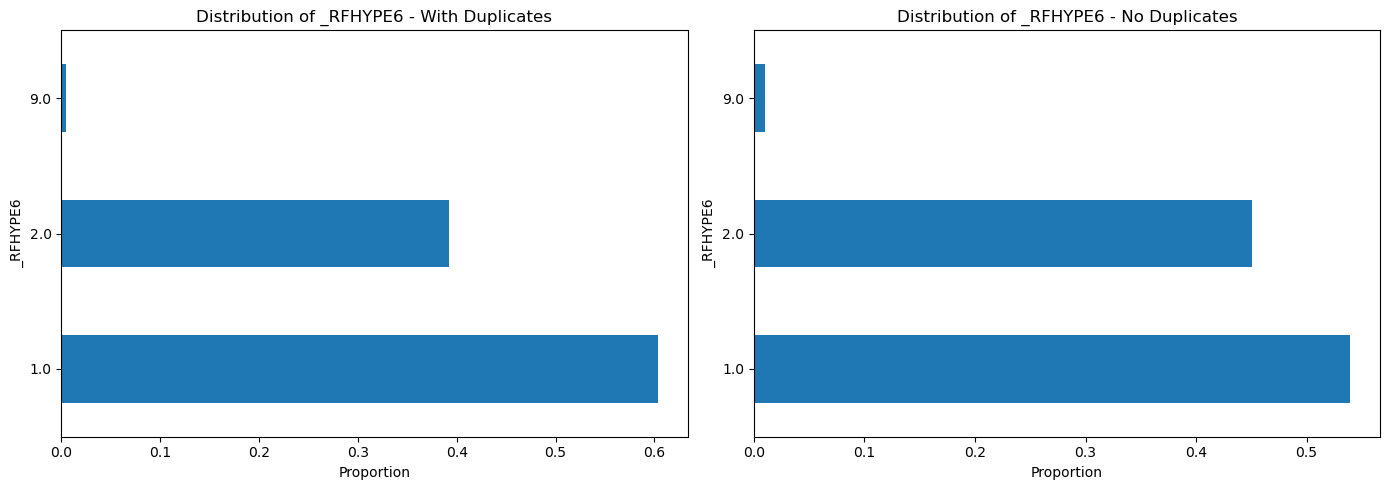

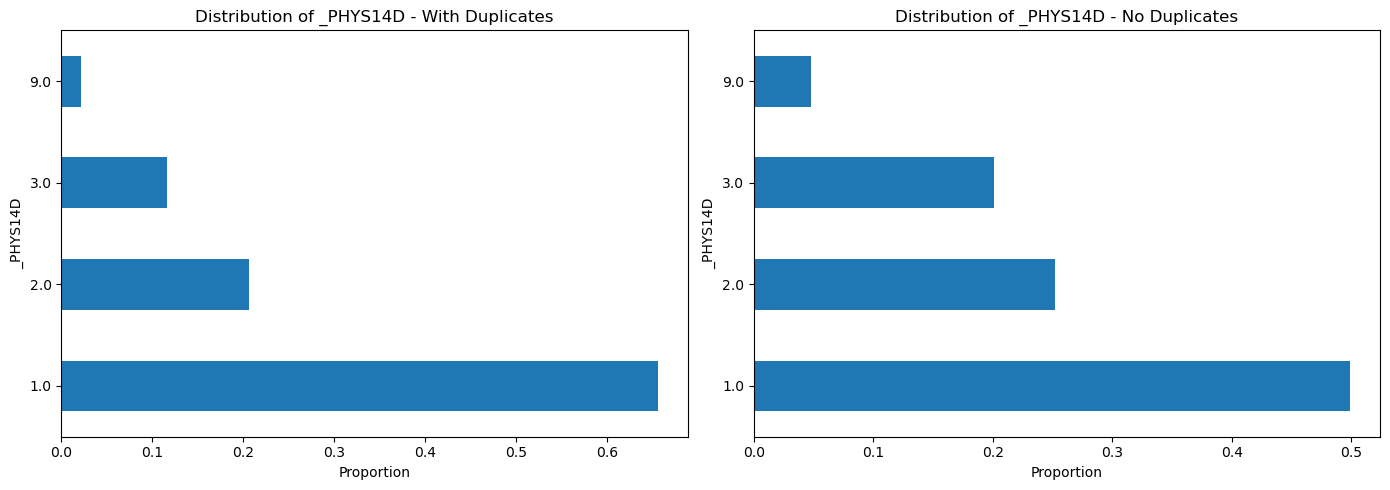

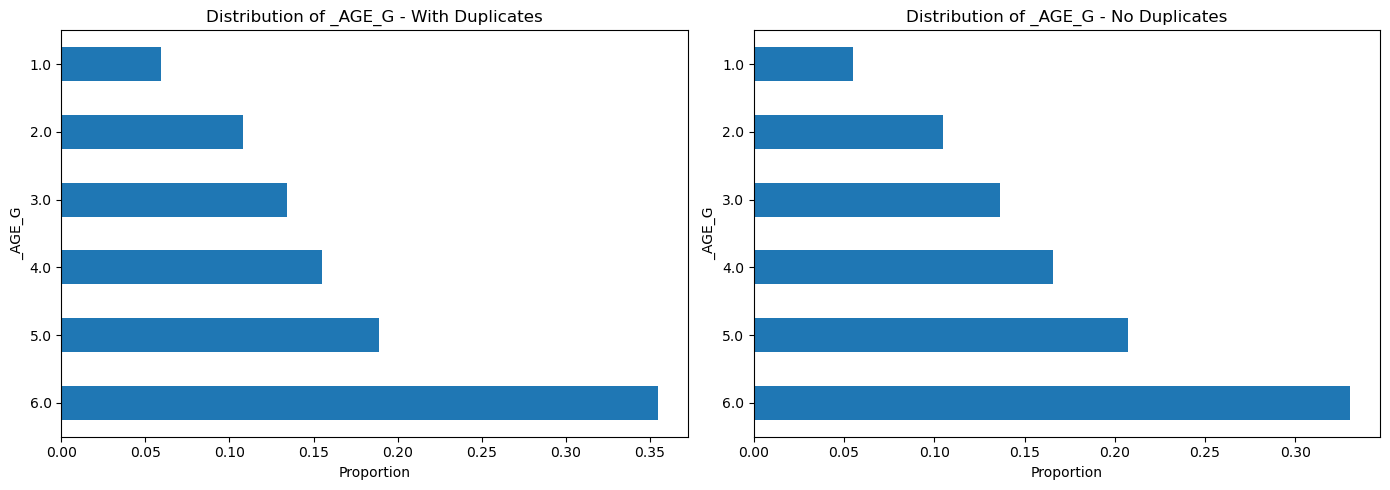

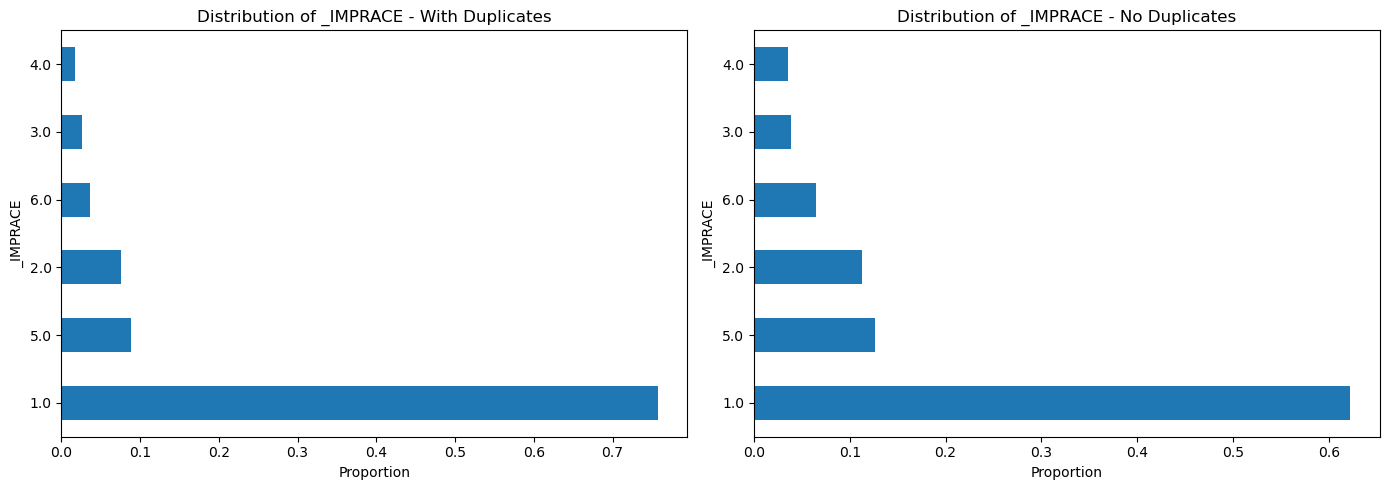

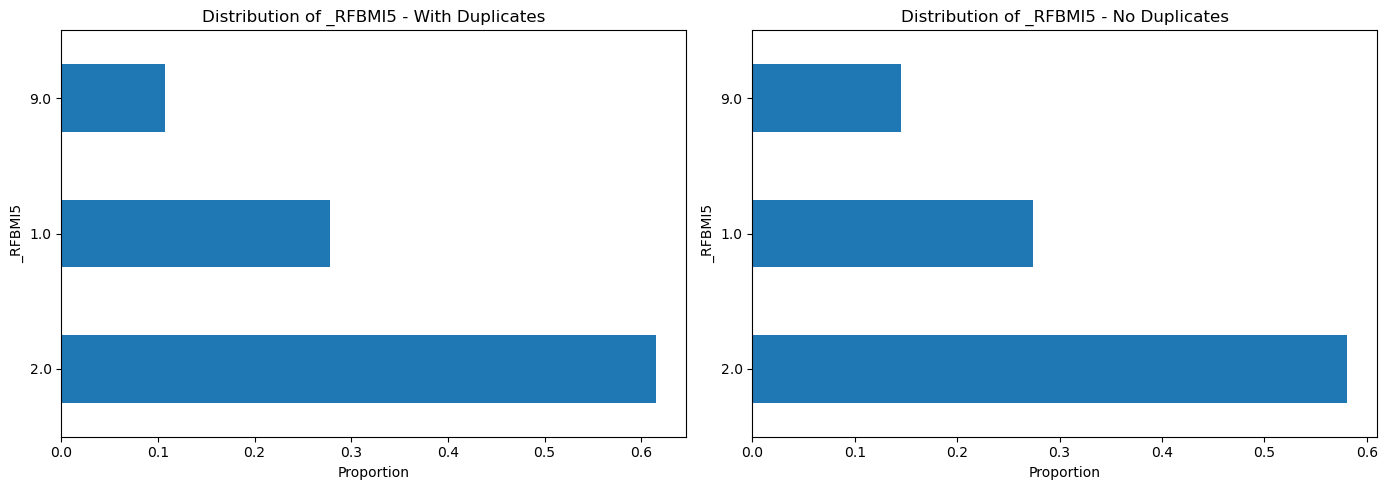

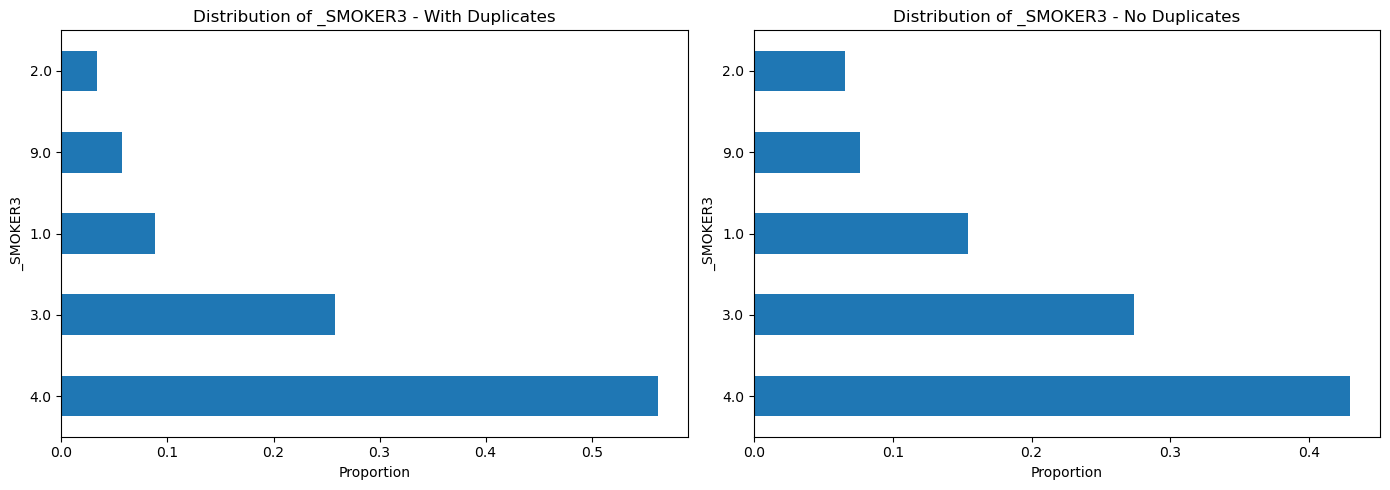

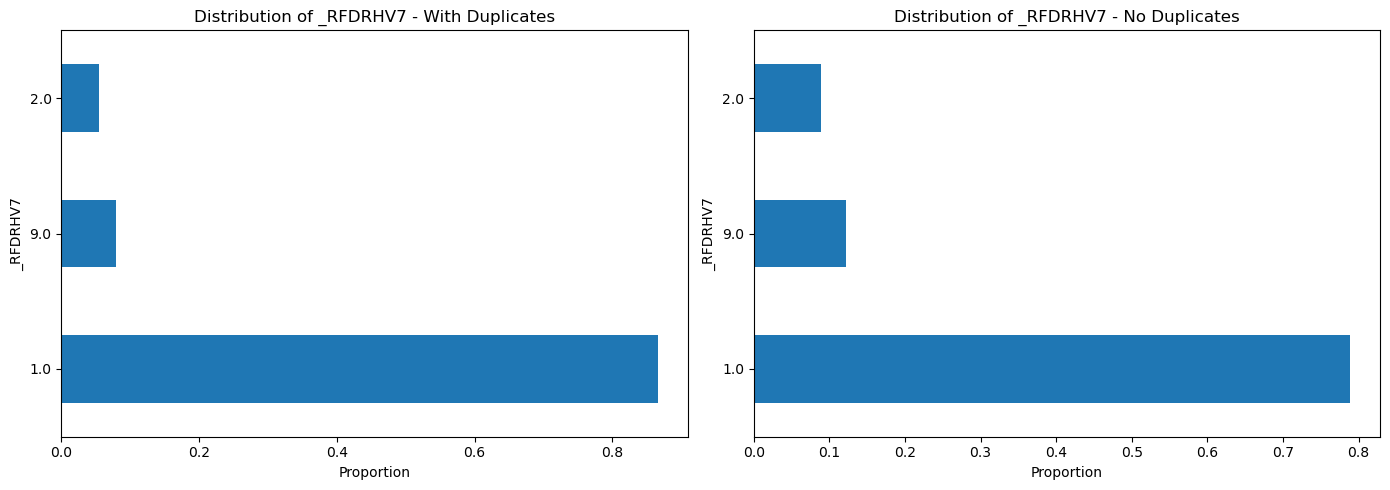

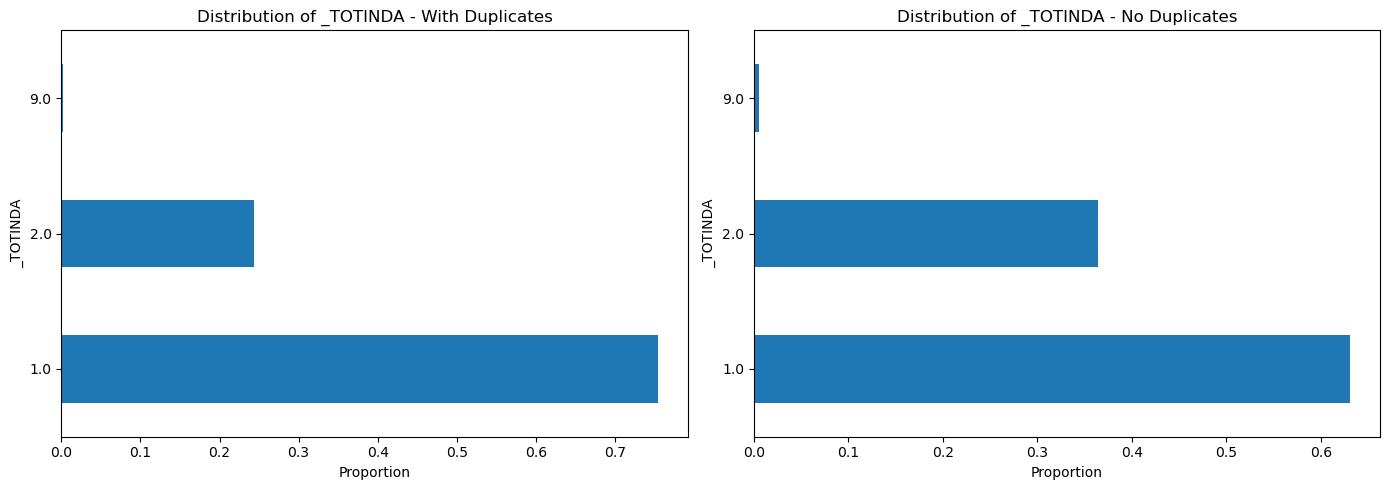

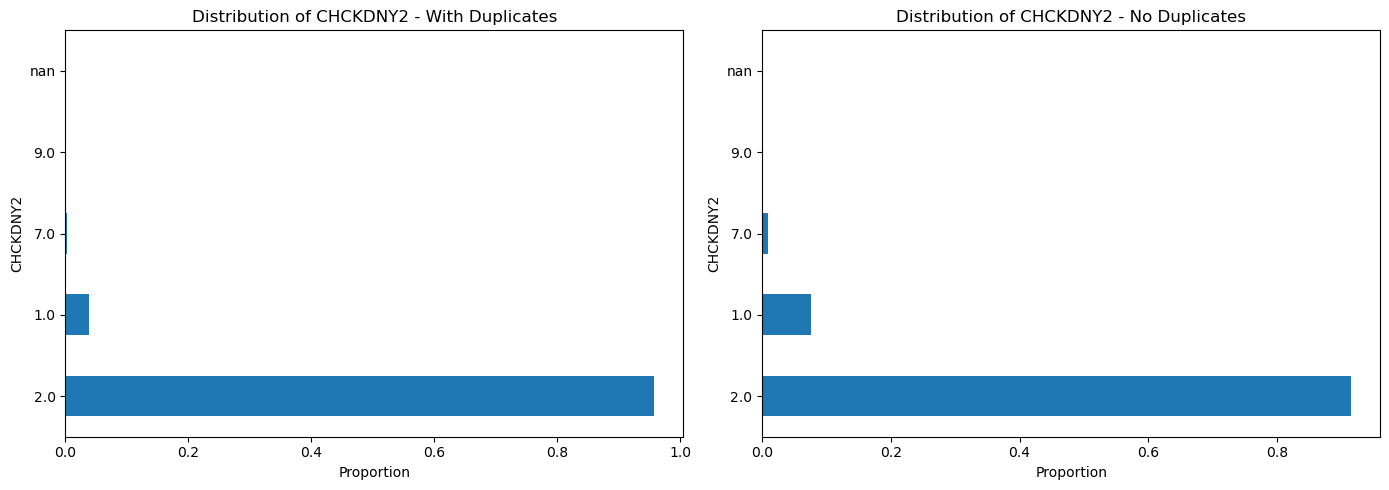

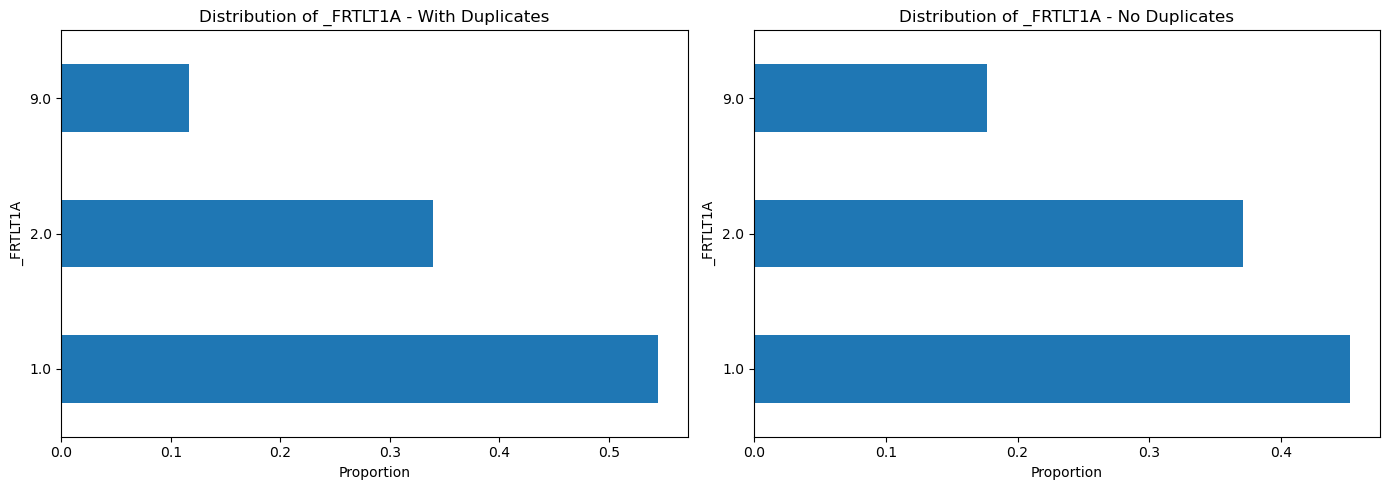

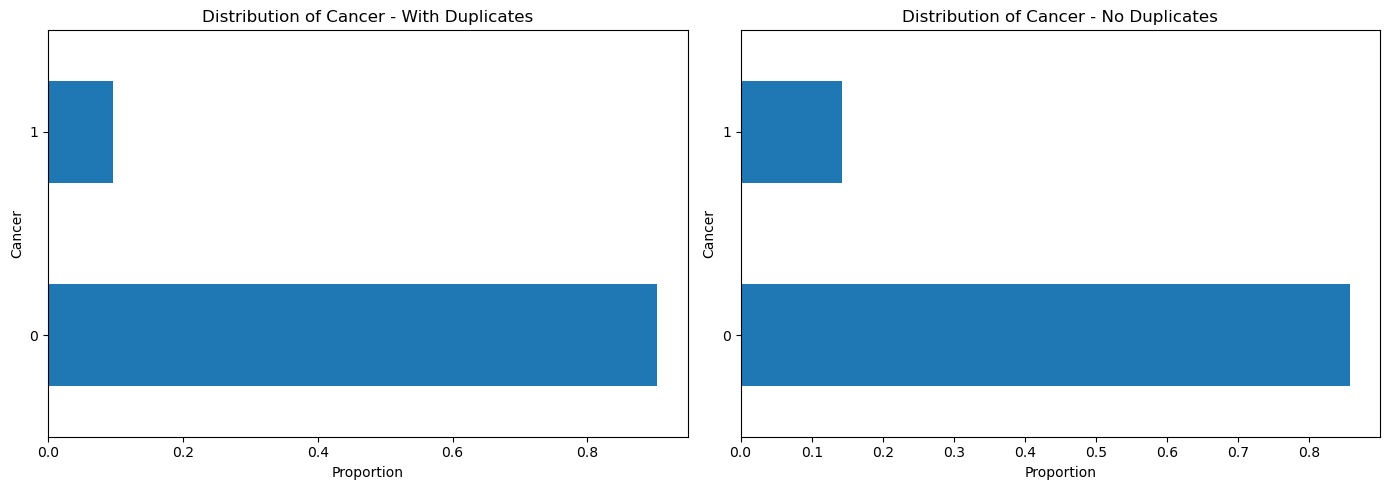

In [26]:

# Compare distributions using EDA plots
for column in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    df[column].value_counts(dropna=False, normalize=True).plot(kind="barh", ax=axes[0])
    axes[0].set_title(f"Distribution of {column} - With Duplicates")
    axes[0].set_xlabel("Proportion")
    
    new_df[column].value_counts(dropna=False, normalize=True).plot(kind="barh", ax=axes[1])
    axes[1].set_title(f"Distribution of {column} - No Duplicates")
    axes[1].set_xlabel("Proportion")
    
    plt.tight_layout()
    plt.show()

The observed similarity in distributions between the dataset with and without duplicates suggests that the duplicated rows may not significantly influence the overall data distribution. Hence, retaining these duplicates could provide added weight to our dataset.

Let's check the proportion of Cancer cases between the two dataframes:

In [27]:
new_df["Cancer"].value_counts(dropna=False, normalize=True)

Cancer
0    0.856711
1    0.143289
Name: proportion, dtype: float64

In [28]:
df["Cancer"].value_counts(dropna=False, normalize=True)

Cancer
0    0.903466
1    0.096534
Name: proportion, dtype: float64

**Identifying missing values and Imputation:**

In [29]:
#To check the number of missing values for columns:
df.isna().sum()

_RFHLTH         0
TOLDHI3     60836
CHECKUP1        2
SEXVAR          0
CHCCOPD3        3
HAVARTH5        3
DIABETE4        3
_RFHYPE6        0
_PHYS14D        0
_AGE_G          0
_IMPRACE        0
_RFBMI5         0
_SMOKER3        0
_RFDRHV7        0
_TOTINDA        0
CHCKDNY2        3
_FRTLT1A        0
Cancer          0
dtype: int64

**Imputing null values for TOLDHI3 column**

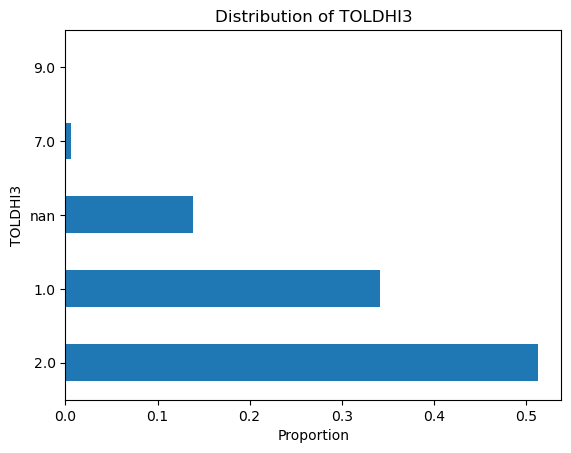

In [30]:
# check the distribution of TOLDHI3 column 
df["TOLDHI3"].value_counts(dropna=False, normalize=True).plot(kind="barh")
plt.title("Distribution of TOLDHI3")
plt.xlabel("Proportion")
plt.show()

In [31]:
df["TOLDHI3"].value_counts(dropna=False, normalize=True)

TOLDHI3
2.0    0.512862
1.0    0.341296
NaN    0.138676
7.0    0.006130
9.0    0.001037
Name: proportion, dtype: float64

Note that almost 13.86% of the values were null here.

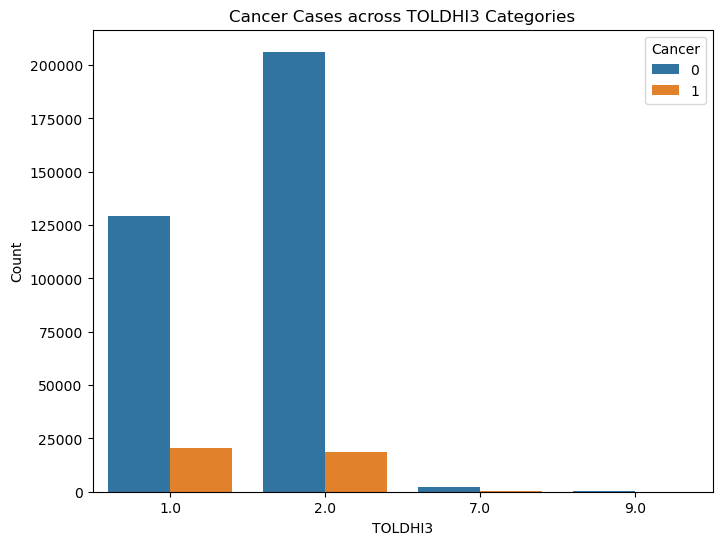

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='TOLDHI3', hue='Cancer', data=df)
plt.xlabel('TOLDHI3')
plt.ylabel('Count')
plt.title('Cancer Cases across TOLDHI3 Categories')
plt.legend(title='Cancer', loc='upper right')
plt.show()

In [33]:
df.groupby(["TOLDHI3",'Cancer'])[["Cancer"]].count()

Cancer
TOLDHI3 Cancer        
1.0     0       129442
        1        20282
2.0     0       206305
        1        18684
7.0     0         2349
        1          340
9.0     0          427
        1           28

The instances of positive cancer cases were most prevalent among individuals with high cholesterol levels.

Based on the data source, the missing entries in the 'TOLDHI3' column signify individuals who either declined or were uncertain about their cholesterol check. To streamline our analysis, we'll merge these uncertain responses, including the refused and don't know categories (coded as 7 and 9), into a unified category labeled as '7'.

In [34]:
# Replacing missing, refused, and don't know values with 7
df['TOLDHI3'].fillna(7, inplace=True)
df['TOLDHI3'].replace({9: 7}, inplace=True)

# Verify the changes
print(df['TOLDHI3'].value_counts(dropna=False))

TOLDHI3
2.0    224989
1.0    149724
7.0     63980
Name: count, dtype: int64


**Checking null values for CHECKUP1,CHCCOPD3,HAVARTH5,DIABETE4 and CHCKDNY2**

In [35]:
rows_with_null = df.isnull().any(axis=1)

# Extract rows with null values
rows_null_values = df[rows_with_null]

print(rows_null_values)

        _RFHLTH  TOLDHI3  CHECKUP1  SEXVAR  CHCCOPD3  HAVARTH5  DIABETE4  \
301         1.0      7.0       NaN     2.0       NaN       NaN       NaN   
386         9.0      7.0       NaN     2.0       NaN       NaN       NaN   
330620      1.0      2.0       1.0     2.0       NaN       NaN       NaN   

        _RFHYPE6  _PHYS14D  _AGE_G  _IMPRACE  _RFBMI5  _SMOKER3  _RFDRHV7  \
301          9.0       2.0     6.0       1.0      9.0       9.0       9.0   
386          9.0       9.0     6.0       1.0      9.0       9.0       9.0   
330620       1.0       1.0     4.0       1.0      9.0       9.0       9.0   

        _TOTINDA  CHCKDNY2  _FRTLT1A  Cancer  
301          9.0       NaN       9.0       0  
386          9.0       NaN       9.0       0  
330620       2.0       NaN       9.0       0  


We've observed only a small number of null values in CHECKUP1, CHCCOPD3, HAVARTH5, DIABETE4, and CHCKDNY2 columns, all within the same rows. As we've confirmed earlier that the removal of these rows doesn't significantly alter the column distributions, and considering the limited count of just 3 rows with null values, we'll proceed with their deletion. This action won't notably impact the overall distribution of our columns.

In [36]:
#drop rows with null values
rows_to_drop = [301, 386, 330620]
df.drop(index=rows_to_drop, inplace=True)

In [37]:
#To check the number of missing values for columns:
df.isna().sum()

_RFHLTH     0
TOLDHI3     0
CHECKUP1    0
SEXVAR      0
CHCCOPD3    0
HAVARTH5    0
DIABETE4    0
_RFHYPE6    0
_PHYS14D    0
_AGE_G      0
_IMPRACE    0
_RFBMI5     0
_SMOKER3    0
_RFDRHV7    0
_TOTINDA    0
CHCKDNY2    0
_FRTLT1A    0
Cancer      0
dtype: int64

Now that we've cleaned the data, let's do some analysis to explore our independent variables and dependent variable.

## Part 2: EDA<a id="EDA"></a>

All of our columns are caregorical columns , so we will observe the relationship between our independent variables and the target variable (Cancer).

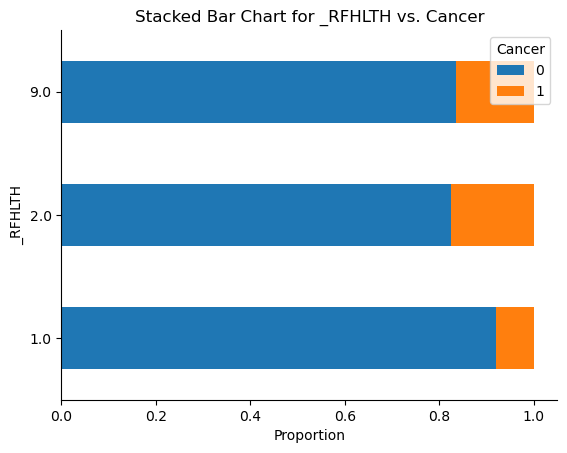

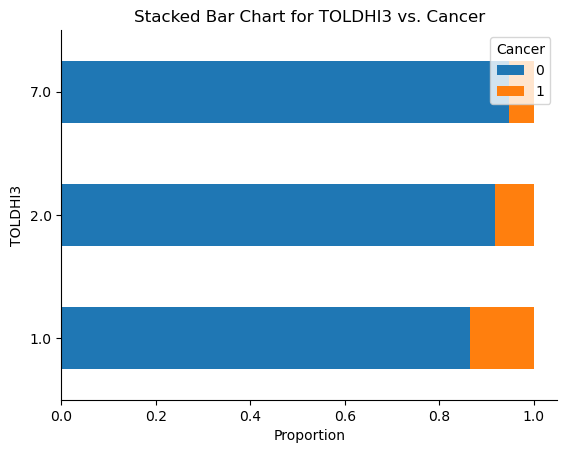

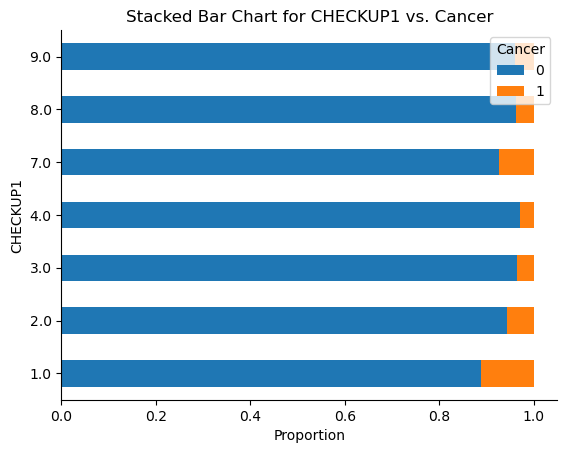

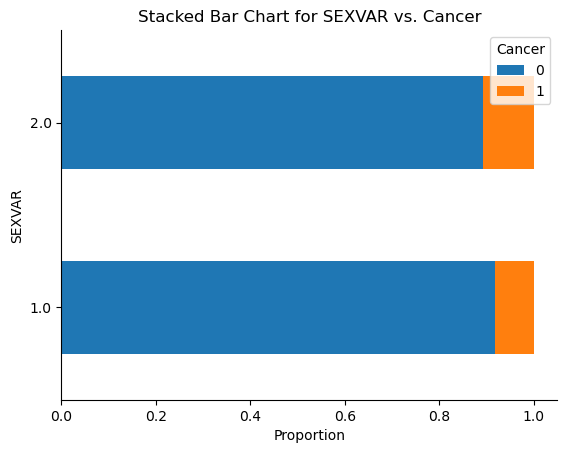

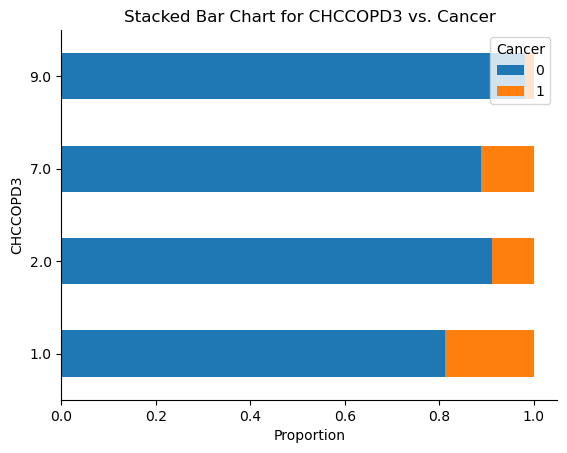

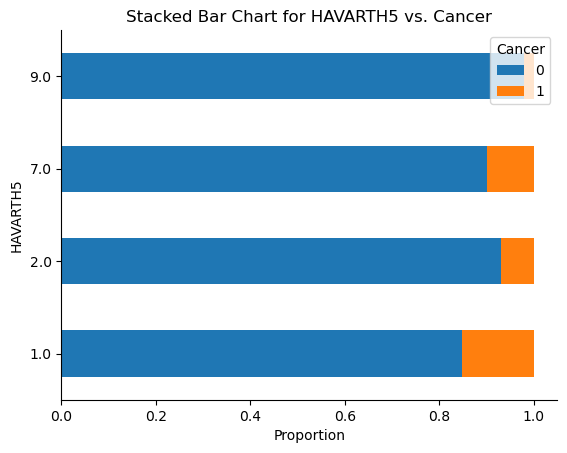

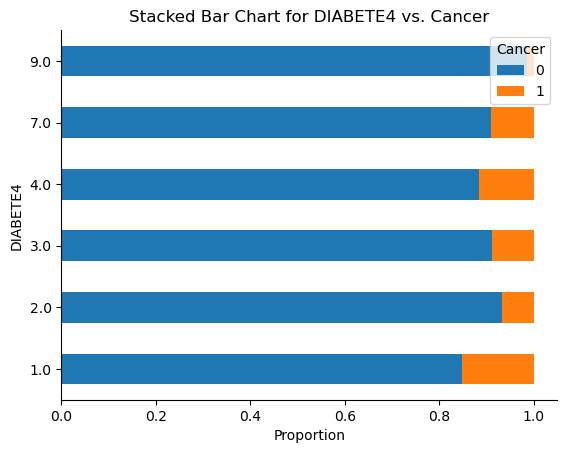

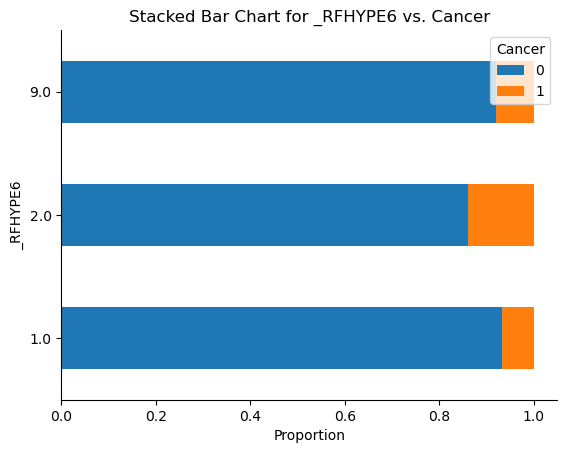

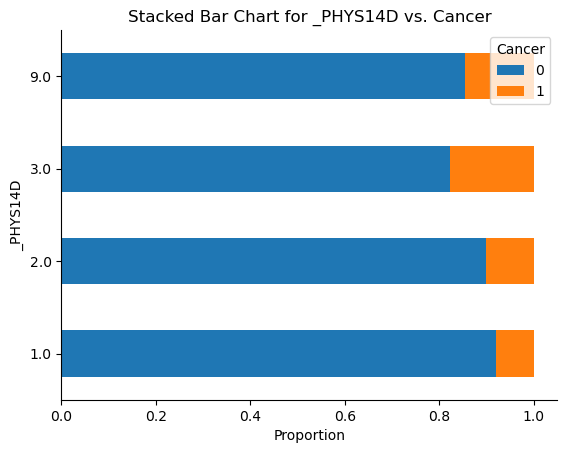

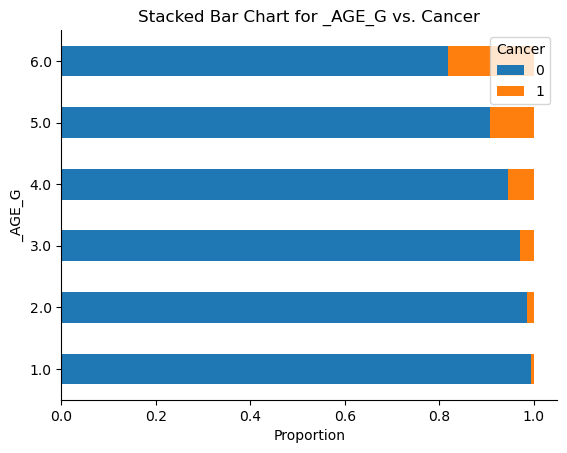

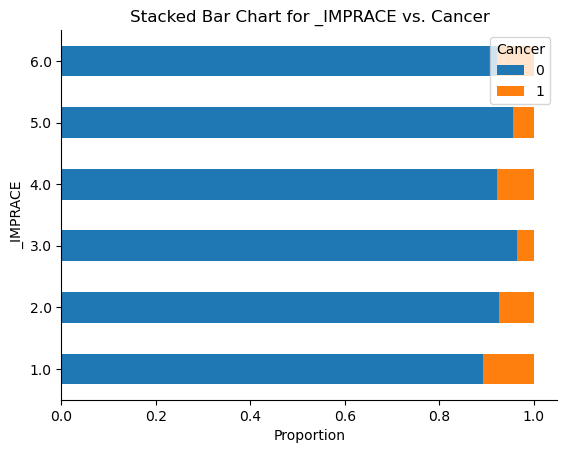

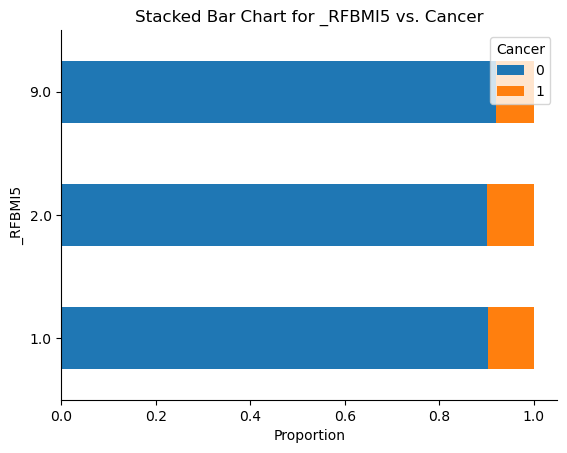

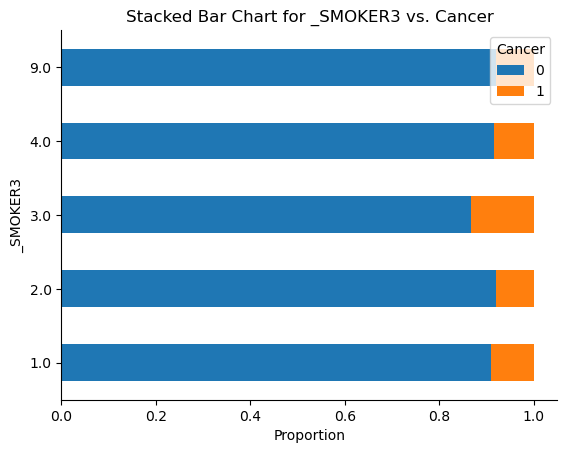

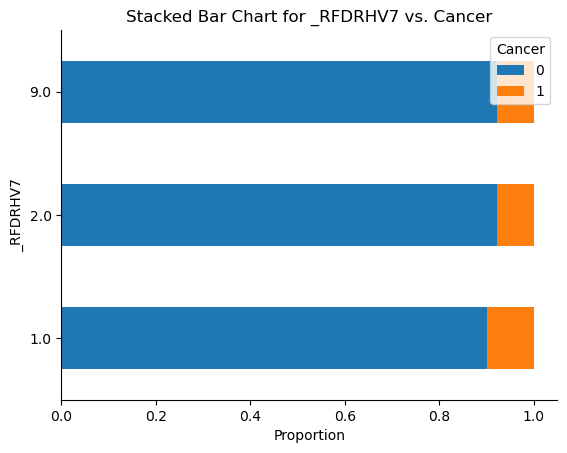

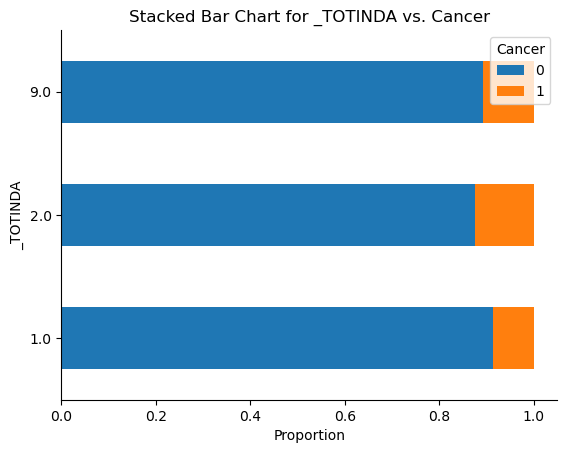

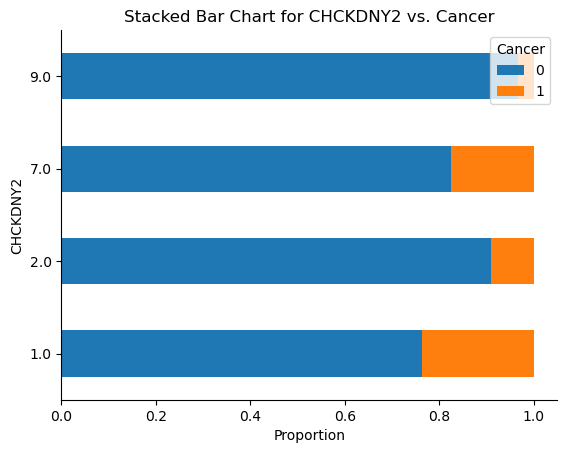

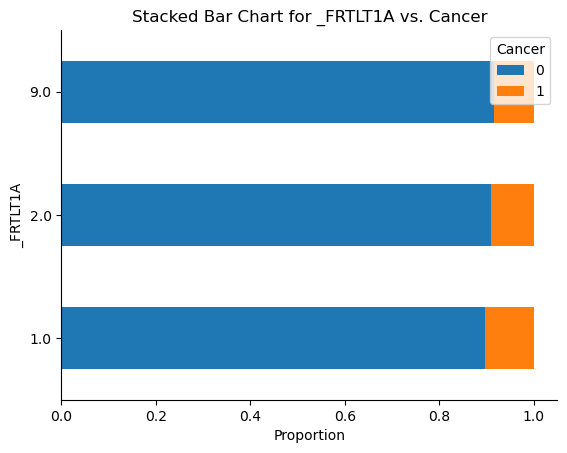

In [38]:
# Plotting stacked bar charts for each categorical column
categorical_cols = df.select_dtypes(include=['float64']).columns

for col in categorical_cols:
    ct = pd.crosstab(df[col], df['Cancer'], normalize='index')
    ct.plot(kind='barh', stacked=True)
    plt.xlabel('Proportion')
    plt.ylabel(col)
    plt.title(f'Stacked Bar Chart for {col} vs. Cancer')
    plt.legend(title='Cancer', loc='upper right')
    sns.despine()

### Findings Summary

Based upon the above visuals, we can see that:

- Patients reporting fair or poor health conditions exhibit a higher risk of developing cancer.
- A notable proportion of cancer patients have reported high cholesterol levels.
- Among cancer patients, the majority had a recent routine checkup within the past year (within the last 12 months). 
- Females constitute a higher number within the group of patients diagnosed with cancer.
- Chronic obstructive pulmonary disease (COPD), emphysema, or chronic bronchitis were prevalent among patients diagnosed with cancer.
- Cancer patients commonly have experienced arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia.
- Diabetes was frequently reported among individuals diagnosed with cancer.
- High blood pressure is prevalent among patients who have been diagnosed with cancer.
- Cancer patients often reported experiencing more than 14 days when their physical health was not good.
- The age group of 65 or older contains the highest number of individuals diagnosed with cancer.
- White, Non-Hispanic race individuals have a higher representation among patients diagnosed with cancer.
- Overweight or obese individuals constituted a substantial portion among patients diagnosed with cancer.
- Former smoking habits were prevalent among individuals diagnosed with cancer.
- Non-heavy drinking behavior was observed among a majority of individuals diagnosed with cancer (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week).
- Lack of physical activity, except for routine jobs, was noted among patients diagnosed with cancer.
- Individuals diagnosed with cancer commonly had kidney disease.
- Cancer patients frequently reported consuming fruit one or more times per day.


## Part 3: Statistical Analysis & Data Preprocessing<a id="Statistical-Analysis-&-Data-Preprocessing"></a>

In [39]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['float64']).columns

# Convert categorical columns to 'object' type
df[categorical_cols] = df[categorical_cols].astype('object')

# Create dummy variables for all categorical columns and concatenate
dummy_df = pd.get_dummies(df[categorical_cols])
df = pd.concat([df.drop(categorical_cols, axis=1), dummy_df], axis=1)

In [40]:
for col in df.columns:
    if df[col].dtype == bool:  # Check if the column contains boolean values
        df[col] = df[col].astype(int)  # Convert boolean to integer (True -> 1, False -> 0)

In [41]:
# To avoid multicollinearity, drop one of the dummy columns for each feature

columns_to_drop = ['_RFHLTH_9.0', 'TOLDHI3_7.0', 'CHECKUP1_9.0', 'SEXVAR_1.0', 'CHCCOPD3_9.0', 'HAVARTH5_9.0', 'DIABETE4_9.0', '_RFHYPE6_9.0', '_PHYS14D_9.0', '_AGE_G_1.0', '_IMPRACE_3.0', '_RFBMI5_9.0', '_SMOKER3_9.0', '_RFDRHV7_9.0', '_TOTINDA_9.0', 'CHCKDNY2_9.0', '_FRTLT1A_9.0']


df = df.drop(columns=columns_to_drop, axis=1)

In [42]:
# To check the dummy variables
df.head()

,Cancer,_RFHLTH_1.0,_RFHLTH_2.0,TOLDHI3_1.0,TOLDHI3_2.0,CHECKUP1_1.0,CHECKUP1_2.0,CHECKUP1_3.0,CHECKUP1_4.0,CHECKUP1_7.0,CHECKUP1_8.0,SEXVAR_2.0,CHCCOPD3_1.0,CHCCOPD3_2.0,CHCCOPD3_7.0,HAVARTH5_1.0,HAVARTH5_2.0,HAVARTH5_7.0,DIABETE4_1.0,DIABETE4_2.0,DIABETE4_3.0,DIABETE4_4.0,DIABETE4_7.0,_RFHYPE6_1.0,_RFHYPE6_2.0,_PHYS14D_1.0,_PHYS14D_2.0,_PHYS14D_3.0,_AGE_G_2.0,_AGE_G_3.0,_AGE_G_4.0,_AGE_G_5.0,_AGE_G_6.0,_IMPRACE_1.0,_IMPRACE_2.0,_IMPRACE_4.0,_IMPRACE_5.0,_IMPRACE_6.0,_RFBMI5_1.0,_RFBMI5_2.0,_SMOKER3_1.0,_SMOKER3_2.0,_SMOKER3_3.0,_SMOKER3_4.0,_RFDRHV7_1.0,_RFDRHV7_2.0,_TOTINDA_1.0,_TOTINDA_2.0,CHCKDNY2_1.0,CHCKDNY2_2.0,CHCKDNY2_7.0,_FRTLT1A_1.0,_FRTLT1A_2.0
0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0
1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0
2,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0
3,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0
4,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0


Now, to test if there is a statistically significant association between each feature and the likelihood of having cancer,we will perform the following analysis: 

For each categorical variable in relation to 'Cancer':

Null Hypothesis (H0):
There is no association between the categorical variable and the likelihood of having cancer.

Alternative Hypothesis (H1):
There is an association between the categorical variable and the likelihood of having cancer.

Note: If our (p-value<0.05), it indicates that there's enough evidence to reject the null hypothesis.

In [43]:
# Chi-square statistical analysis was performed
from scipy.stats import chi2_contingency

# 'Cancer' is the column indicating the presence or absence of cancer

for column in df.columns:
    if column != 'Cancer':
        contingency_table = pd.crosstab(df[column], df['Cancer'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        print(f"Chi-square statistic for {column}: {chi2}")
        print(f"P-value for {column}: {p}")
        print()

Chi-square statistic for _RFHLTH_1.0: 6412.513505417766
P-value for _RFHLTH_1.0: 0.0

Chi-square statistic for _RFHLTH_2.0: 6322.421909685296
P-value for _RFHLTH_2.0: 0.0

Chi-square statistic for TOLDHI3_1.0: 3948.598883959603
P-value for TOLDHI3_1.0: 0.0

Chi-square statistic for TOLDHI3_2.0: 963.4702496044695
P-value for TOLDHI3_2.0: 1.5655425270929808e-211

Chi-square statistic for CHECKUP1_1.0: 3734.7689143316074
P-value for CHECKUP1_1.0: 0.0

Chi-square statistic for CHECKUP1_2.0: 1069.3310248474368
P-value for CHECKUP1_2.0: 1.5300198905609076e-234

Chi-square statistic for CHECKUP1_3.0: 1051.4234476792085
P-value for CHECKUP1_3.0: 1.193818819419747e-230

Chi-square statistic for CHECKUP1_4.0: 1021.9930418499065
P-value for CHECKUP1_4.0: 2.977301858361903e-224

Chi-square statistic for CHECKUP1_7.0: 34.46489234335505
P-value for CHECKUP1_7.0: 4.340093397306866e-09

Chi-square statistic for CHECKUP1_8.0: 94.4252354567662
P-value for CHECKUP1_8.0: 2.545265963449422e-22

Chi-square 

### Findings Summary of the Above Results:

- **_RFHLTH_1.0 and _RFHLTH_2.0**

Both variables demonstrate notably high chi-square statistics (6412.51 and 6322.42) with p-values of 0.0. This indicates a highly significant relationship between perceived health statuses (_RFHLTH_1.0 and _RFHLTH_2.0) and the occurrence of cancer.

- **TOLDHI3_1.0**

This variable demonstrates a high chi-square statistic and an extremely low p-value (0.0), suggesting a strong and statistically significant association with cancer. This variable significantly correlate with the presence of cancer.

- **TOLDHI3_2.0** 

TOLDHI3_2.0 has a relatively lower but still significant chi-square statistic and an impressively low p-value (1.5655425270929808e-211). This variable is less strongly linked to cancer compared to TOLDHI3_1.0, but still exhibit a substantial association with cancer occurrence.

- **CHECKUP1_1.0**

The high chi-square statistic (3734.77) and a p-value of 0.0 suggest a statistically significant association between this variable and the incidence of cancer. This variable appears strongly linked to the presence or absence of cancer within the dataset.

- **CHECKUP1_2.0, CHECKUP1_3.0, CHECKUP1_4.0**

Each of these variables exhibits remarkably high chi-square statistics and extremely low p-values (ranging from 1069 to 1021), implying a robust and statistically significant relationship between them and the occurrence of cancer. Each of these categories seems to significantly correlate with the presence or absence of cancer in the dataset.

- **CHECKUP1_7.0 and CHECKUP1_8.0**

While still statistically significant, CHECKUP1_7.0 and CHECKUP1_8.0 demonstrate relatively lower chi-square statistics but notably low p-values (34.46 and 94.43, respectively). These variables exhibit a less pronounced but still significant association with the incidence of cancer.

- **SEXVAR_2.0**

SEXVAR_2.0, which represents a gender variable, demonstrates a substantial chi-square statistic (803.49) and an exceedingly low p-value (9.38655887660031e-177). This suggests a highly significant association between gender and cancer incidence within the dataset.

- **CHCCOPD3_1.0 and CHCCOPD3_2.0**

Both CHCCOPD3_1.0 and CHCCOPD3_2.0 display remarkably high chi-square statistics and extremely low p-values (3512.92 and 3332.64, respectively), indicating a strong and statistically significant relationship between these variables (possibly related to chronic health conditions) and the presence or absence of cancer.

- **CHCCOPD3_7.0**

The chi-square statistic (4.44) is relatively lower compared to prior variables, and the associated p-value is (0.035). This suggests a moderate statistical significance in the relationship between this variable and cancer incidence. While statistically notable, this relationship might be less strong than some previously examined variables.

- **HAVARTH5_1.0 and HAVARTH5_2.0**

Both variables demonstrate notably high chi-square statistics (7520.05 and 7397.75) along with extremely low p-values (both 0.0). These variables exhibit highly significant association with cancer incidence within the dataset.

- **HAVARTH5_7.0:**

This variable shows a very low chi-square statistic (0.17) and a p-value (0.68) considerably higher than the standard significance threshold. As such, this particular category may not exhibit a significant association with the incidence of cancer within this dataset.


- **DIABETE4_4.0**

The chi-square statistic for the variable DIABETE4_4.0 is approximately 48.03, indicating a moderate association between this specific category (DIABETE4_4.0) and the presence or absence of cancer.The corresponding p-value is approximately 4.20e-12, which is a very small value. In statistical terms, this indicates strong evidence against the null hypothesis. In this context, it suggests that there's a statistically significant relationship between DIABETE4_4.0 and the occurrence of cancer in the dataset.

- **DIABETE4_1.0 and DIABETE4_3.0**

 Both variables show very high chi-square statistics and low p-values, suggesting a strong and statistically significant association between these different categories of diabetes-related variables and cancer incidence within the dataset.

- **DIABETE4_2.0**

This variable exhibits a low p-value (9.17e-10), indicating a significant relationship with cancer, although its chi-square statistic is relatively lower than the aforementioned variables.

- **DIABETE4_7.0**

DIABETE4_7.0 demonstrates a notably higher p-value (0.71), signifying a lack of statistically significant association between this particular category of diabetes-related variable and the incidence of cancer in this dataset.

 - **_RFHYPE6_1.0 and _RFHYPE6_2.0**

For _RFHYPE6_1.0 and _RFHYPE6_2.0, both have notably high chi-square statistics of around 6108.74 and 6187.13, respectively, with extremely low p-values of 0.0. These results suggest a strong statistical association between these variables and the occurrence of cancer in the dataset.

- **PHYS14D_1.0**

PHYS14D_1.0 exhibits a significant chi-square statistic of approximately 2886.17 with a p-value of 0.0, indicating a substantial association between this variable and cancer.

- **_PHYS14D_2.0**

_PHYS14D_2.0 has a lower chi-square statistic of about 24.54 but still possesses a statistically significant relationship with cancer, as evidenced by its very low p-value of approximately 7.27e-07.

- **_PHYS14D_3.0**

This variable demonstrates a high chi-square statistic of around 4344.03, coupled with a p-value of 0.0, indicating a robust association between this variable and the presence or absence of cancer in the dataset.

- **_AGE_G_2.0, _AGE_G_3.0, and _AGE_G_4.0**

 All of the variables display substantial chi-square statistics ranging from approximately 1695.85 to 4026.76, accompanied by p-values of 0.0. These results suggest a strong association between these age groups and the incidence of cancer.


- **_AGE_G_5.0**

This variable shows a relatively lower chi-square statistic of about 10.22, but its p-value of 0.0014 still indicates a statistically significant association between this particular age group and cancer.

- **_AGE_G_6.0**

_AGE_G_6.0, exhibits an exceptionally high chi-square statistic of around 20134.14 with a p-value of 0.0, indicating an extremely strong association between this age group and cancer within the dataset.

- **_IMPRACE_1.0, _IMPRACE_5.0, and _IMPRACE_6.0**

For _IMPRACE_1.0 and _IMPRACE_5.0, all variables demonstrate statistically significant associations with cancer, as indicated by their relatively high chi-square statistics and very low p-values. These variables represent different racial or ethnic groups and their varying associations with the presence or absence of cancer in the dataset.Also , _IMPRACE_6.0 showcases a moderate chi-square statistic of around 66.23, paired with a low p-value of 4.02e-16, indicating a statistically significant association between this racial or ethnic group and the presence or absence of cancer.

- **_IMPRACE_2.0, _IMPRACE_4.0**

IMPRACE_2.0 displays a moderate chi-square statistic of approximately 217.87, accompanied by an extremely low p-value of 2.64e-49. This suggests a statistically significant association between this particular racial or ethnic group and the occurrence of cancer within the dataset.Also , _IMPRACE_4.0 exhibits a lower chi-square statistic of around 31.66 but still holds statistical significance with a p-value of 1.84e-08. This indicates that this racial or ethnic group also shows an association with the presence or absence of cancer, albeit to a lesser extent than _IMPRACE_2.0.

- **_RFBMI5_1.0**

_RFBMI5_1.0 has a very low chi-square statistic of approximately 0.0183, along with a high p-value of 0.8925. This suggests a lack of statistically significant association between this BMI category and the presence or absence of cancer.

- **_RFBMI5_2.0**

_RFBMI5_2.0 displays a higher chi-square statistic of around 56.2663, coupled with a notably low p-value of 6.33e-14. This indicates a strong statistically significant association between this BMI category and the occurrence of cancer within the dataset.

- **_SMOKER3_1.0**

_SMOKER3_1.0 showcases a chi-square statistic of about 20.3657, along with a moderately low p-value of 6.4e-06. This signifies a statistically significant association between this smoking category and the presence or absence of cancer.

- **_SMOKER3_2.0 and _SMOKER3_3.0**

_SMOKER3_2.0 demonstrates a higher chi-square statistic of around 44.5774, paired with a lower p-value of 2.44e-11, indicating a strong statistically significant association between this smoking category and the incidence of cancer.Also , _SMOKER3_3.0 displays a substantially high chi-square statistic of approximately 2296.6241, coupled with a very low p-value of 0.0, indicating an exceptionally strong statistically significant association between this smoking category and the presence or absence of cancer within the dataset.

- **_SMOKER3_4.0**

_SMOKER3_4.0 exhibits a high chi-square statistic of about 1072.0256, with an extremely low p-value of 3.97e-235, indicating a very strong statistically significant association between this smoking category and the incidence of cancer.

- **_RFDRHV7_1.0**

This variable exhibits a moderately high chi-square statistic of approximately 281.58 with a very low p-value (3.39e-63), indicating a strong statistically significant association between this variable and cancer.

- **_RFDRHV7_2.0**

_RFDRHV7_2.0 shows a lower chi-square statistic of about 104.23 but still maintains a considerably low p-value (1.80e-24), indicating a statistically significant association between this variable and the presence or absence of cancer.

- **_TOTINDA_1.0 and _TOTINDA_2.0**

Both _TOTINDA_1.0 and _TOTINDA_2.0 present very high chi-square statistics (around 1319.43 and 1317.94, respectively) with extremely low p-values (6.78e-289 and 1.43e-288, respectively). These values suggest a remarkably strong statistically significant association between physical activity level and cancer within the dataset.

- **CHCKDNY2_1.0 and CHCKDNY2_2.0**

CHCKDNY2_1.0 and CHCKDNY2_2.0 both display high chi-square statistics (approximately 4014.07 and 3947.19, respectively) with a p-value of 0.0, indicating a strong statistically significant association between chronic kidney disease diagnosis and cancer.

- **CHCKDNY2_7.0**

CHCKDNY2_7.0 showcases a lower chi-square statistic of about 105.58 but maintains a significantly low p-value (9.12e-25), indicating a statistically significant association between this variable and the presence or absence of cancer.

- **_FRTLT1A_1.0 and _FRTLT1A_2.0**

_FRTLT1A_1.0 and _FRTLT1A_2.0 demonstrate moderate to high chi-square statistics (approximately 218.13 and 77.73, respectively) with considerably low p-values (2.31e-49 and 1.18e-18, respectively), suggesting a statistically significant association between fruit consumption and cancer within the dataset.

Now , we will plot heatmaps to visualize the correlations between our independent variables and the presence or absence of cancer and to observe multicollinearity between our predictors.

### Heatmap 1

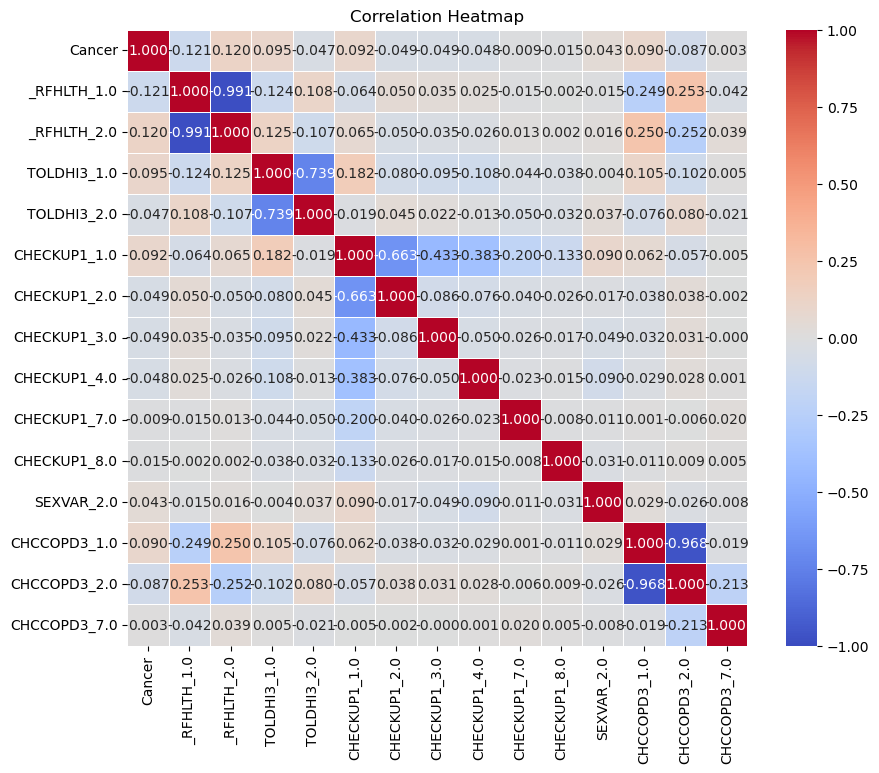

In [44]:
Selected_Columns=['Cancer','_RFHLTH_1.0','_RFHLTH_2.0','TOLDHI3_1.0','TOLDHI3_2.0','CHECKUP1_1.0','CHECKUP1_2.0','CHECKUP1_3.0','CHECKUP1_4.0','CHECKUP1_7.0','CHECKUP1_8.0','SEXVAR_2.0','CHCCOPD3_1.0','CHCCOPD3_2.0','CHCCOPD3_7.0']
# Calculate the correlation matrix
correlation_matrix = df[Selected_Columns].corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,fmt='.3f',vmin=-1,vmax=1,center=0, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

From the heatmap analysis, key variables such as '_RFHLTH_1.0', '_RFHLTH_2.0', 'TOLDHI3_1.0', 'CHECKUP1_1.0', 'SEXVAR_2.0', 'CHCCOPD3_1.0', and 'CHCCOPD3_2.0' display the most significant correlations with 'Cancer'. While these correlations are generally weak, they stand out as the most pronounced. Notably, there are high negative correlations observed between '_RFHLTH_1.0' and '_RFHLTH_2.0' at -0.99, 'TOLDHI3_1.0' and 'TOLDHI3_2.0' at -0.74, as well as 'CHECKUP1_1.0' and 'CHECKUP1_2.0' at -0.66. Similarly, 'CHCCOPD3_1.0' and 'CHCCOPD3_2.0' exhibit a significant negative correlation of -0.97.

It's crucial to acknowledge that these strong correlations might impact the model's interpretability, stability, and the reliability of the coefficient estimates. The presence of collinearity among these variables warrants careful consideration in our analysis and modeling decisions. Conversely, 'CHCCOPD3_7.0' displays a notably weak negative correlation with our target variable, 'Cancer'.

### Heatmap 2

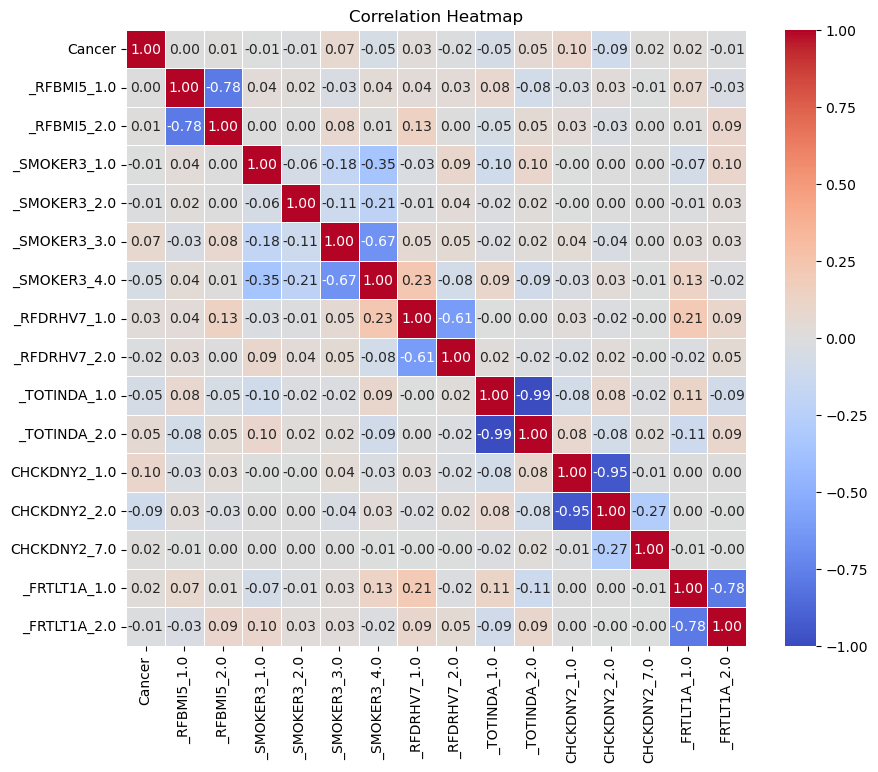

In [45]:
Selected_Columns= ['Cancer','_RFBMI5_1.0','_RFBMI5_2.0','_SMOKER3_1.0','_SMOKER3_2.0','_SMOKER3_3.0','_SMOKER3_4.0','_RFDRHV7_1.0','_RFDRHV7_2.0','_TOTINDA_1.0','_TOTINDA_2.0','CHCKDNY2_1.0','CHCKDNY2_2.0','CHCKDNY2_7.0','_FRTLT1A_1.0','_FRTLT1A_2.0']
# Calculate the correlation matrix
correlation_matrix = df[Selected_Columns].corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,fmt='.2f',vmin=-1,vmax=1,center=0, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The heatmap analysis highlights notable correlations among 'CHCKDNY2_1.0', 'CHCKDNY2_2.0', '_TOTINDA_1.0', '_TOTINDA_2.0', and '_SMOKER3_3.0'. Delving into collinearity, significant negative correlations are evident between '_RFBMI5_1.0' and '_RFBMI5_2.0' at -0.78, '_SMOKER3_3.0' and '_SMOKER3_4.0' at -0.67, as well as '_RFDRHV7_1.0' and '_RFDRHV7_2.0' at -0.61. Further, a high negative correlation is observed between '_TOTINDA_1.0' and '_TOTINDA_2.0' at -0.99. Additionally, 'CHCKDNY2_2.0' and 'CHCKDNY2_1.0' exhibit a robust negative correlation of -0.95, while '_FRTLT1A_1.0' and '_FRTLT1A_2.0' show a correlation of -0.78.

These variables demonstrate statistically significant correlations with cancer presence, albeit with relatively weak strengths. Understanding these correlations provides valuable insights, although their impact on predictive modeling should be considered cautiously due to their moderate strengths and potential collinearity effects.

### Heatmap 3

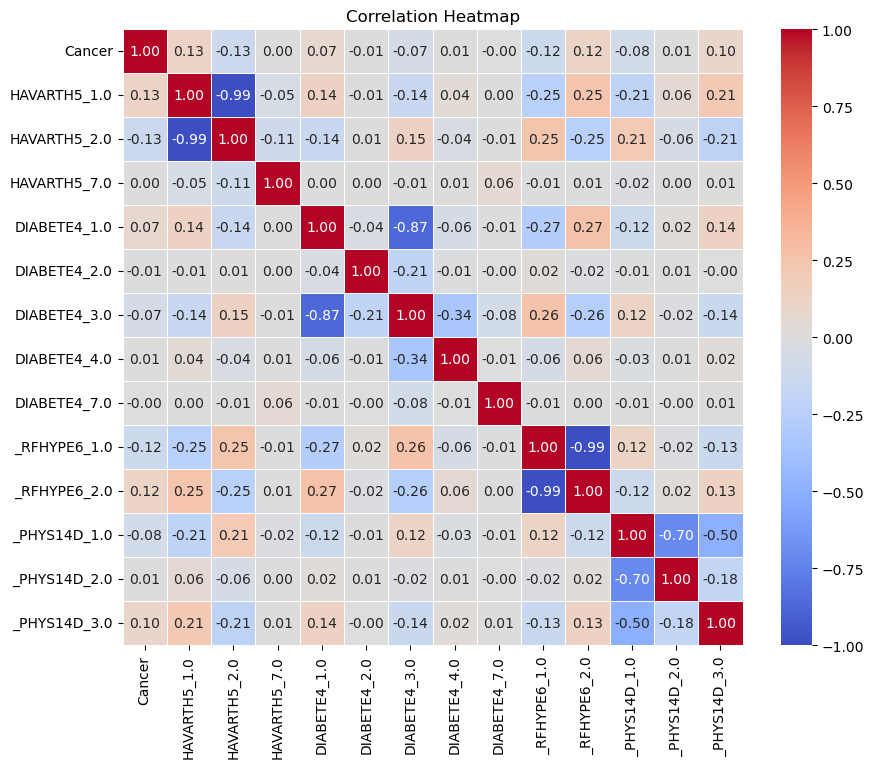

In [46]:
Selected_Columns=['Cancer','HAVARTH5_1.0','HAVARTH5_2.0','HAVARTH5_7.0','DIABETE4_1.0','DIABETE4_2.0','DIABETE4_3.0','DIABETE4_4.0','DIABETE4_7.0','_RFHYPE6_1.0','_RFHYPE6_2.0','_PHYS14D_1.0','_PHYS14D_2.0','_PHYS14D_3.0']
# Calculate the correlation matrix
correlation_matrix = df[Selected_Columns].corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,fmt='.2f', vmin=-1,vmax=1,center=0, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The heatmap analysis highlights significant high correlations between 'HAVARTH5_1.0', 'HAVARTH5_2.0', 'DIABETE4_1.0', '_RFHYPE6_1.0', '_RFHYPE6_2.0', '_PHYS14D_3.0', and the target variable 'Cancer'. However, several predictors exhibit high negative correlations among themselves. 'HAVARTH5_1.0' and 'HAVARTH5_2.0' show a remarkably high negative correlation at -0.99, while 'DIABETE4_1.0' and 'DIABETE4_3.0' display a substantial negative correlation at -0.87. Additionally, '_RFHYPE6_1.0' and '_RFHYPE6_2.0' present a strong negative correlation at -0.99, and '_PHYS14D_1.0' demonstrates significant associations with '_PHYS14D_2.0' and '_PHYS14D_3.0'. These correlations could affect model interpretation and performance, indicating redundancy among predictors and potential challenges with multicollinearity.

### Heatmap 4

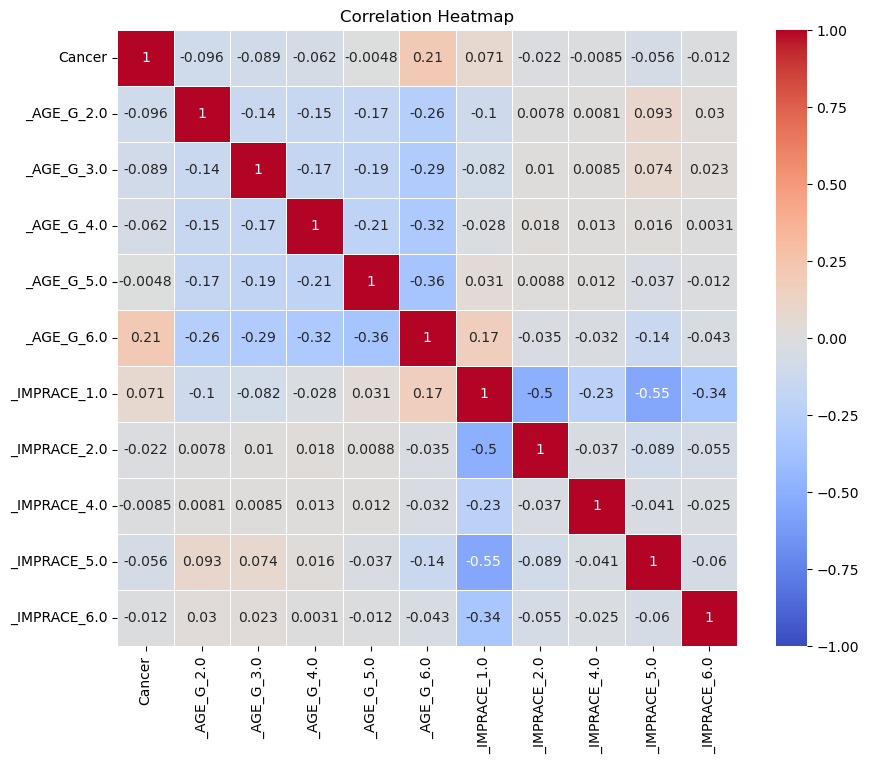

In [47]:
Selected_Columns=['Cancer','_AGE_G_2.0','_AGE_G_3.0','_AGE_G_4.0','_AGE_G_5.0','_AGE_G_6.0','_IMPRACE_1.0','_IMPRACE_2.0','_IMPRACE_4.0','_IMPRACE_5.0','_IMPRACE_6.0']
# Calculate the correlation matrix
correlation_matrix = df[Selected_Columns].corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,vmin=-1,vmax=1,center=0, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The heatmap indicates substantial correlations between '_AGE_G_6.0', '_AGE_G_3.0', '_IMPRACE_1.0', '_IMPRACE_5.0', and the target variable 'Cancer'. Specifically, '_IMPRACE_1.0' demonstrates a moderate negative correlation with both '_IMPRACE_2.0' and '_IMPRACE_5.0

Now, we will calculate Cramér's V as a measure of association used to quantify the strength of association between our predictors and target variable :

Based on our analysis above , those are the possible predictors for our model : 'HAVARTH5_1.0', 'HAVARTH5_2.0', '_RFHLTH_1.0', '_RFHLTH_2.0', 'CHECKUP1_1.0', 'CHECKUP1_2.0', 'CHECKUP1_3.0', 'CHECKUP1_4.0', 'SEXVAR_2.0', 'CHCCOPD3_1.0', 'DIABETE4_1.0', '_RFHYPE6_2.0','_PHYS14D_3.0', '_AGE_G_6.0', '_AGE_G_2.0', '_AGE_G_3.0', '_AGE_G_4.0', '_IMPRACE_1.0','_RFBMI5_2.0', '_SMOKER3_3.0', '_RFDRHV7_1.0', '_TOTINDA_1.0', '_TOTINDA_2.0', 'CHCKDNY2_1.0','_FRTLT1A_1.0', '_FRTLT1A_2.0']

Now , we will perform Cramér's V analysis for our chosen predictors:

In [49]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_rows_cols = min(contingency_table.shape)
    v = (chi2 / (n * (min_rows_cols - 1))) ** 0.5
    return v


#our selected columns
columns_to_check = ['HAVARTH5_1.0', 'HAVARTH5_2.0', '_RFHLTH_1.0', '_RFHLTH_2.0', 'CHECKUP1_1.0', 'CHECKUP1_2.0',
                    'CHECKUP1_3.0', 'CHECKUP1_4.0', 'SEXVAR_2.0', 'CHCCOPD3_1.0', 'DIABETE4_1.0', '_RFHYPE6_2.0',
                    '_PHYS14D_3.0', '_AGE_G_6.0', '_AGE_G_2.0', '_AGE_G_3.0', '_AGE_G_4.0', '_IMPRACE_1.0',
                    '_RFBMI5_2.0', '_SMOKER3_3.0', '_RFDRHV7_1.0', '_TOTINDA_1.0', '_TOTINDA_2.0', 'CHCKDNY2_1.0',
                    '_FRTLT1A_1.0', '_FRTLT1A_2.0']

for col in columns_to_check:
    if col != 'Cancer':  # Exclude the 'Cancer' column itself
        v = cramers_v(df[col], df['Cancer'])
        print(f"Cramér's V for {col} and 'Cancer': {v}")

Cramér's V for HAVARTH5_1.0 and 'Cancer': 0.13092766520813917
Cramér's V for HAVARTH5_2.0 and 'Cancer': 0.1298586494691059
Cramér's V for _RFHLTH_1.0 and 'Cancer': 0.12090249939356522
Cramér's V for _RFHLTH_2.0 and 'Cancer': 0.12005019494016081
Cramér's V for CHECKUP1_1.0 and 'Cancer': 0.09226840225894589
Cramér's V for CHECKUP1_2.0 and 'Cancer': 0.04937160165434694
Cramér's V for CHECKUP1_3.0 and 'Cancer': 0.04895645490553944
Cramér's V for CHECKUP1_4.0 and 'Cancer': 0.04826642160529896
Cramér's V for SEXVAR_2.0 and 'Cancer': 0.042796901307369066
Cramér's V for CHCCOPD3_1.0 and 'Cancer': 0.08948597155882247
Cramér's V for DIABETE4_1.0 and 'Cancer': 0.07350438445167976
Cramér's V for _RFHYPE6_2.0 and 'Cancer': 0.11875879612817437
Cramér's V for _PHYS14D_3.0 and 'Cancer': 0.0995102318289037
Cramér's V for _AGE_G_6.0 and 'Cancer': 0.2142336240990338
Cramér's V for _AGE_G_2.0 and 'Cancer': 0.09580736715100267
Cramér's V for _AGE_G_3.0 and 'Cancer': 0.08888349853959825
Cramér's V for _AGE_

### Summary Findings :

- 'HAVARTH5_1.0' and 'HAVARTH5_2.0' exhibit a moderate association with 'Cancer', with Cramér's V values around 0.13. This suggests a noteworthy but not very strong relationship between self-reported arthritis and cancer presence.


- '_RFHLTH_1.0' and '_RFHLTH_2.0' both demonstrate moderate associations with 'Cancer', showing Cramér's V values around 0.12. This indicates that perceived general health (fair or poor) could have some association with the occurrence of cancer.

- 'CHECKUP1_1.0' shows a moderate association (Cramér's V ≈ 0.09) with 'Cancer', indicating that individuals who had a routine checkup within the past year might have a slightly stronger association with cancer presence.


- '_SEXVAR_2.0' exhibits a relatively weak association (Cramér's V ≈ 0.04) with 'Cancer', suggesting a minimal relationship between gender and cancer incidence.


- 'CHCCOPD3_1.0' shows a moderate association (Cramér's V ≈ 0.09) with 'Cancer', suggesting a notable but not strong relationship between chronic obstructive pulmonary disease and cancer.


- 'DIABETE4_1.0' demonstrates a moderate association (Cramér's V ≈ 0.07) with 'Cancer', implying a potential link between diabetes and cancer occurrence.

- '_RFHYPE6_2.0' shows a moderate association (Cramér's V ≈ 0.12) with 'Cancer', suggesting a potential link between high blood pressure and cancer presence.

- '_PHYS14D_3.0' exhibits a moderate association (Cramér's V ≈ 0.10) with 'Cancer', implying that individuals who face limitations due to physical, mental, or emotional problems might have a slightly stronger association with cancer.


- '_AGE_G_6.0' shows the strongest association among the listed variables (Cramér's V ≈ 0.21), indicating a relatively higher association between older age groups and cancer presence


- '_IMPRACE_1.0' and '_SMOKER3_3.0'  shows a moderate to weak association (Cramér's V ≈ 0.07) with 'Cancer'. They might not strongly predict the likelihood of cancer incidence by themselves.

- 'CHCKDNY2_1.0' shows a moderate association with cancer comparing with other variables. Moreover , '_TOTINDA_1.0' and '_TOTINDA_2.0' shows a weak association (Cramér's V ≈ 0.054) with cancer. Lastly, '_FRTLT1A_1.0' and '_FRTLT1A_2.0' shows very weak association (Cramér's V ≈ 0.022 ,0.013) with cancer.

## Conclusion :<a id="Conclusion"></a>

- Each predictor displays a varying weak correlation with our target variable, evaluated by different chi-square statistics to assess their significance.

- Among cancer patients, the majority had a recent routine checkup within the past year (within the last 12 months).This could be explained that those who go for routine checkups might also be more proactive about their health, leading to earlier cancer detection. Also , People with preexisting health conditions might be more inclined to go for routine checkups. Therefore, these conditions might increase the risk of cancer, leading to a higher correlation between checkup frequency and cancer presence.

- Females (_SEXVAR_2.0) constitute a higher number within the group of patients diagnosed with cancer. This could be because of lifestyle choices, environmental exposures, or genetic predispositions can influence the likelihood of developing cancer, and these factors might affect females differently than males.

- Individuals diagnosed with cancer commonly experience coexisting conditions such as chronic obstructive pulmonary disease (COPD), emphysema, or chronic bronchitis. Arthritis, including rheumatoid arthritis, gout, lupus, or fibromyalgia, is also frequently reported among cancer patients.

- Patients reporting fair or poor health conditions exhibit a higher risk of developing cancer.
- A notable proportion of cancer patients have reported high cholesterol levels.

- _RFBMI5_1.0 has a very low chi-square statistic of approximately 0.0183, along with a high p-value of 0.8925. This suggests a lack of statistically significant association between this BMI category and the presence or absence of cancer.

- DIABETE4_7.0 demonstrates a notably higher p-value (0.71), signifying a lack of statistically significant association between this particular variable and the incidence of cancer in this dataset.

- Diabetes and high blood pressure prevail among those diagnosed with cancer. Additionally, individuals with cancer often report experiencing more than 14 days of compromised physical health.

- There is a higher association between older age groups and cancer presence.The longer exposure to risk factors and a potentially compromised immune system in older individuals could further contribute to the elevated prevalence of cancer within these age groups.


- Individuals of White, Non-Hispanic ethnicity are notably overrepresented among those diagnosed with cancer. This may be influenced by various factors such as disparities in healthcare access, genetic predispositions, environmental exposures, and socioeconomic factors.

- A significant portion of individuals diagnosed with cancer are overweight or obese.This could be attributed to lifestyle choices, dietary habits, and metabolic factors that contribute to cancer development.


- Former smoking habits were prevalent among individuals diagnosed with cancer, and a majority showed non-heavy drinking behavior. This could reflect past lifestyle choices that have contributed to their health conditions.

- Individuals diagnosed with cancer commonly had kidney disease. Kidney disease and cancer share risk factors such as aging, certain genetic predispositions, lifestyle habits like smoking or poor diet, and exposure to specific environmental toxins or treatments that could affect both conditions.

- '_FRTLT1A_1.0' and '_FRTLT1A_2.0' shows very weak association (Cramér's V ≈ 0.022 ,0.013) with cancer.Consuming a diet abundant in fruits and vegetables is often linked to a reduced risk of specific cancers. However, certain fruits, particularly those high in sugar, might indirectly contribute to weight gain or obesity, potentially increasing the likelihood of developing certain types of cancer.